#                                       Astronomical Census: An analytical study to unravel patterns and define baselines for scientific outreach in Brazil

First of all, I will start by introducing myself. I am an astronomy student at Universidade de São Paulo, Brazil; I also have been working (professionally) with Data Science for a year now. This work was conducted during a semester course of Astronomy Outreach, teached by professor Jorge Melendez. 
This study intends to identify how astronomical knowledge is related to demographic data in brazillian society (more specifically, age, gender, schooling, parents' schooling and profession); in that way, if patterns and groups are identified, profile-based outreach actions can be conducted, leading to more efficient scientific spreadness. Moreover, this work also intends to serve as a benchmark; the analysis conducted aims to be a standard to be followed and repeated in the future (and monitored over time, after actions have been taken), with more data. 
And how was the "census" conducted? A questionnaire, consisting of 6 demographic questions and 18 multiple alternative questions (with 5 alternatives each) about astronomical knowledge was spread out through Survey Monkey; nearly 600 answers were collected in three weeks. More details on this process and the questions chosen can be viewed on a paper about this work, soon to be published (I will attach it when it's finished).
All right! Now that we are set, let's proceed to the analysis itself!

## Table of Contents

1) [Data Cleaning and Data Manipulation](#1)

2) [Initial Exploration and Visualization](#2)

----2.1) [Distribution of Hits](#2.1)
   
----2.2) [Distributions for Easy, Medium and Hard questions](#2.2)

----2.3) [Correlation between Hits and Level of Question](#2.3)

----2.4) [Demographic Distributions](#2.4)

----2.5) [Distributions for each question](#2.5)

----2.6) [Aggregating Demographic Data](#2.6)

----2.7) [Hits per question, sorted in ascending order](#2.7)

----2.8) [Correlations between answers and between answers and number of hits](#2.8)

3) [Regression](#3)
 
----3.1) [Dimensionality Reduction (PCA)](#3.1)

----3.2) [K-NN Regression](#3.2)

----3.3) [Grid Search (Pipeline PCA + K-NN Regression) ](#3.3)

4) [Finding Patterns](#4)

----4.1) [Profile based on Hit Group](#4.1)

----4.2) [Multi-bar Chart on Demographic Data and Hit Groups](#4.2)
 
----4.3) [Association Rule](#4.3)

----4.4) [Correlations between answers and Demographic Profile](#4.4)

----4.5) [Multiple Component Analysis (MCA)](#4.5)

5) [Classification](#5)

----5.1) [Accuracies (K-NN, Logistic Regression, Random Forest and Voting Classifier)](#5.1)

----5.2) [Feature Importance](#5.2)

----5.3) [Final Accuracy Table (+ Neural Network)](#5.3)
 
----5.4) [Error Analysis](#5.4)
 
  
6) [Conclusions and Perspectives](#6)

## 1) Data Cleaning and Data Manipulation <a class="anchor" id="1"></a>

###  Imports

In [2]:
%matplotlib inline

import numpy as np #numerical functions
import pandas as pd #data manipulation framework
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting as well
from scipy import stats #statistics 
from math import sqrt #just the squared root function
import matplotlib.patches as mpatches #for legends
from sklearn.model_selection import train_test_split #all sklearn packages are related to ML algorithms and models 
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.frequent_patterns import apriori #apriori algorithm
from mlxtend.frequent_patterns import association_rules #association rules
import mca #Multiple Component Analysis
import tensorflow as tf #for neural networks
import random #for operations involving randomness

import warnings #disable annoying warnings in notebook
warnings.filterwarnings('ignore')

### Reading Data from CSV file

In [3]:
df = pd.read_csv('Censo Astronômico.csv')

df.head(3)

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Qual é a sua idade?,...,"O que é uma ""estrela cadente""?",Qual a diferença entre cometa e asteroide?,O que é uma nebulosa?,Qual destes(as) é um(a) astrônomo(a) brasileiro(a)?,O que é um buraco negro?,"Qual a idade do Universo, aproximadamente?",Por que é necessário colocar telescópios no espaço?,O Sol morrerá um dia. O que ele se tornará?,Identifique a nebulosa:,Selecione a alternativa que associa corretamente a constelação a seu nome:
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Response,...,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,1.024865e+10,216856699.0,09/30/2018 03:39:00 PM,09/30/2018 03:44:27 PM,NaN,NaN,NaN,NaN,NaN,14 a 17,...,É um asteroide ou meteoro que entra na atmosfe...,"Ambos orbitam o Sol, porém asteroides possuem ...","É uma nuvem rica em gás e poeira, a partir da ...",Marcelo Gleiser,É o remanescente de uma estrela muito grande e...,14 bilhões de anos,"Devido à turbulência da atmosfera, que perturb...",Uma Anã Branca,Image 4,Escorpião
2,1.024844e+10,216856699.0,09/30/2018 11:20:35 AM,09/30/2018 11:38:11 AM,NaN,NaN,NaN,NaN,NaN,35 a 44,...,É um asteroide ou meteoro que entra na atmosfe...,"Ambos orbitam o Sol, porém asteroides possuem ...","É uma nuvem rica em gás e poeira, a partir da ...",Marcelo Gleiser,É o remanescente de uma estrela muito grande e...,14 bilhões de anos,"Devido à turbulência da atmosfera, que perturb...",Uma Anã Branca,Image 4,Escorpião


All right, all right! You noticed that the column names and answers are in portuguese. Don't worry; for the sake of international compatibility, it will be translated to english in a bit.

### Dropping unnecessary columns and empty first row

In [4]:
df = df.drop(['collector_id', 'date_created', 'date_modified', 'ip_address', 'email_address', 
'first_name', 'last_name', 'custom_1'], axis=1)

df = df.drop(df.index[0])   

### Missing Values

In [5]:
miss = df.apply(lambda x: x.count(), axis=1)

miss.value_counts()

25    500
7      85
dtype: int64

Out of 585 answers, 500 (85%) were complete, and in 85 cases only the demographic data was collected. These incomplete answers will simply be discarded.

In [6]:
df_clean = df.dropna(how='any')

df_clean.shape

(500, 25)

### Translating Column Names

In [7]:
new_cols = ['id', 'Age', 'Gender', 'Schooling', 'Father_Schooling','Mother_Schooling', 'Profession', 'Sun', 'SS_Nplan',
       'SS_BigPlan', 'Galaxy', 'Moon', 'Distance', 'Earth_Format', 'Eclipse', 'Shooting_Star', 'Comet_Asteroid', 
       'Nebula', 'Astronomer', 'Black_Hole', 'Universe_Age', 'Telescope', 'Sun_Death', 'Nebula_Image', 'Constellation'
        ]

df_clean.columns = new_cols

df_clean.head(3)

,id,Age,Gender,Schooling,Father_Schooling,Mother_Schooling,Profession,Sun,SS_Nplan,SS_BigPlan,...,Shooting_Star,Comet_Asteroid,Nebula,Astronomer,Black_Hole,Universe_Age,Telescope,Sun_Death,Nebula_Image,Constellation
1,1.024865e+10,14 a 17,Feminino,Superior Incompleto,Superior Completo,Superior Completo,Estudante,Uma estrela,8,Júpiter,...,É um asteroide ou meteoro que entra na atmosfe...,"Ambos orbitam o Sol, porém asteroides possuem ...","É uma nuvem rica em gás e poeira, a partir da ...",Marcelo Gleiser,É o remanescente de uma estrela muito grande e...,14 bilhões de anos,"Devido à turbulência da atmosfera, que perturb...",Uma Anã Branca,Image 4,Escorpião
2,1.024844e+10,35 a 44,Masculino,Superior Completo,Fundamental Completo,Médio Completo,Professor,Uma estrela,8,Júpiter,...,É um asteroide ou meteoro que entra na atmosfe...,"Ambos orbitam o Sol, porém asteroides possuem ...","É uma nuvem rica em gás e poeira, a partir da ...",Marcelo Gleiser,É o remanescente de uma estrela muito grande e...,14 bilhões de anos,"Devido à turbulência da atmosfera, que perturb...",Uma Anã Branca,Image 4,Escorpião
3,1.024772e+10,18 a 24,Masculino,Superior Incompleto,Superior Completo,Superior Completo,Coach,Uma estrela,7,Júpiter,...,É um asteroide ou meteoro que entra na atmosfe...,"Cometas são frios, possuem órbitas estáveis e ...",É uma região do espaço extremamente turbulenta...,Alberto Garibaldi,"É uma região do espaço ""vazia"", sem massa e se...",14 bilhões de anos,"Devido à turbulência da atmosfera, que perturb...",Uma Supernova,Image 4,Escorpião


### Translating and shortening answers

In [8]:
pd.options.mode.chained_assignment = None 

# Age
age_keys = list(df_clean.Age.unique())
age_vals = ['14 to 17', '35 to 44', '18 to 24', '25 to 34', '45 to 60', '60 or more', '13 or more']
age_dict = dict(zip(age_keys, age_vals))
df_clean['Age'] = df_clean['Age'].replace(age_dict)

# Gender
gender_keys = list(df_clean.Gender.unique())
gender_vals = ['F', 'M', 'O']
gender_dict = dict(zip(gender_keys, gender_vals))
df_clean['Gender'] = df_clean['Gender'].replace(gender_dict)

# Schooling
school_keys = list(df_clean.Schooling.unique())
school_vals = ['Incomplete Higher', 'Complete Higher', 'Complete HS', 'Complete Graduate', 'Incomplete Graduate',
 'Complete ES', 'Incomplete ES', 'Incomplete HS']
school_dict = dict(zip(school_keys, school_vals))
df_clean['Schooling'] = df_clean['Schooling'].replace(school_dict)

# Father schooling
fschool_keys = list(df_clean.Father_Schooling.unique())
fschool_vals = ['Complete Higher', 'Complete ES', 'Complete Graduate', 'Incomplete ES', 'Incomplete Higher', 
  'Complete HS', 'Incomplete Graduate', 'Incomplete HS']
fschool_dict = dict(zip(fschool_keys, fschool_vals))
df_clean['Father_Schooling'] = df_clean['Father_Schooling'].replace(fschool_dict)

# Mother schooling
mschool_keys = list(df_clean.Mother_Schooling.unique())
mschool_vals = ['Complete Higher', 'Complete HS', 'Complete Graduate', 'Incomplete ES', 'Incomplete Graduate', 
               'Incomplete Higher', 'Incomplete HS', 'Complete ES']
mschool_dict = dict(zip(mschool_keys, mschool_vals))
df_clean['Mother_Schooling'] = df_clean['Mother_Schooling'].replace(mschool_dict)

# Profession
profession_keys = list(df_clean.Profession.unique())
profession_vals = ['Student', 'Professor', 'Coach', 'Astronomer', 'Others', 'Historian', 'Security Guard',
 'Engineer', 'Advertising', 'Jornalist', 'Secretary', 'Systems Analist', 'Businessman','Autonomous', 'Counter',
 'Programmer', 'Biologist', 'Cooker', 'Social Worker', 'Retired', 'Chemist', 'Physician', 'Mechanical', 'Dancer',
 'Statistician', 'Military', 'Salesman', 'Photographer', 'Technologist', 'Firefighter', 'Data Scientist',
 'Writer', 'Lawyer', 'Architect','Psychologist', 'Nurse', 'Artist', 'Doctor', 'Clerk', 'Pedagogue', 'Dentist',
 'Pharmaceutical', 'Nutritionist', 'Zootechnist', 'Economist', 'Physiotherapist', 'Farmer', 'Sociologist',
 'Driver', 'Delegate', 'Auditor', 'Athlete', 'Cashier', 'Beautician', 'Musician', 'Hair Stylist',
 'Hotelier', 'Mathematician']
profession_dict = dict(zip(profession_keys, profession_vals))
df_clean['Profession'] = df_clean['Profession'].replace(profession_dict)

# Sun
sun_keys = list(df_clean.Sun.unique())
sun_vals = ['Star', 'Planet', 'Construction of Antiquity', 'Galaxy']
sun_dict = dict(zip(sun_keys, sun_vals))
df_clean['Sun'] = df_clean['Sun'].replace(sun_dict)

#Nplan
nplan_keys = list(df_clean.SS_Nplan.unique())
nplan_vals = ['8', '7', '9', 'Only Earth is a planet', '5']
nplan_dict = dict(zip(nplan_keys, nplan_vals))
df_clean['SS_Nplan'] = df_clean['SS_Nplan'].replace(nplan_dict)

# SS_BigPlan
ss_keys = list(df_clean.SS_BigPlan.unique())
ss_vals = ['Jupiter', 'Saturn', 'Uranus', 'Sun', 'Mars']
ss_dict = dict(zip(ss_keys, ss_vals))
df_clean['SS_BigPlan'] = df_clean['SS_BigPlan'].replace(ss_dict)

# Galaxy
gal_keys = list(df_clean.Galaxy.unique())
gal_vals = ['Milky Way', 'Andromeda', 'It has no name', 'Local Group']
gal_dict = dict(zip(gal_keys, gal_vals))
df_clean['Galaxy'] = df_clean['Galaxy'].replace(gal_dict)

# Moon
moon_keys = list(df_clean.Moon.unique())
moon_vals = ['Natural Satellite', 'Comet', 'Asteroid', 'Planet', "Part of Earth's atmosphere"]
moon_dict = dict(zip(moon_keys, moon_vals))
df_clean['Moon'] = df_clean['Moon'].replace(moon_dict)

# Distance
dist_keys = list(df_clean.Distance.unique())
dist_vals = ['150 billion Km', '150 million Km', '150 sextillion Km', '150 trillion Km', '150 thousand Km']
dist_dict = dict(zip(dist_keys, dist_vals))
df_clean['Distance'] = df_clean['Distance'].replace(dist_dict)

# Format
fmt_keys = list(df_clean.Earth_Format.unique())
fmt_vals = ['Geoid', 'Round', 'Helicoid', 'Toroid', 'Flat']
fmt_dict = dict(zip(fmt_keys, fmt_vals))
df_clean['Earth_Format'] = df_clean['Earth_Format'].replace(fmt_dict)

# Eclipse
ecli_keys = list(df_clean.Eclipse.unique())
ecli_vals = ['Sun, Earth and Moon aligned, with the Earth between the Sun and the Moon', 
             'Sun, Earth and Moon aligned, with the Moon between the Sun and the Earth', 
             'Sun and Moon aligned, with the Earth in front of the Moon', 'Sun between the Moon and the Earth',
            'Atmospheric Phenomena']
ecli_dict = dict(zip(ecli_keys, ecli_vals))
df_clean['Eclipse'] = df_clean['Eclipse'].replace(ecli_dict)

# Shooting Star
shoot_keys = list(df_clean.Shooting_Star.unique())
shoot_vals = ['Burning body entering atmosphere','Comet close to Earth','Traveling Star', 'Very shiny star', 
              'Artificial Satellite']
shoot_dict = dict(zip(shoot_keys, shoot_vals))
df_clean['Shooting_Star'] = df_clean['Shooting_Star'].replace(shoot_dict)

# Comet Asteroid
cmt_keys = list(df_clean.Comet_Asteroid.unique())
cmt_vals = ['Asteroids are rocky and on stable orbits, comets are icy and on elliptical orbits',
            'Comets are cold, stable orbits and not necessarily orbit the Sun. Asteroids are hot, with chaotic orbits and always orbit the Sun',
            'Both are similar, but asteroids are older and can enter the atmosphere',
            'No difference. Two names because of historical reasons',
            'Both are made of the same material, but comets have a tail because of higher velocities']
cmt_dict = dict(zip(cmt_keys, cmt_vals))
df_clean['Comet_Asteroid'] = df_clean['Comet_Asteroid'].replace(cmt_dict)

# Nebula
neb_keys = list(df_clean.Nebula.unique())
neb_vals = ['Cloud rich in gas and dust, from which the stars are formed',
 'Turbulent region of space, due to stars being too close',
 'Rest of a dying star',
 'Rare type of galaxy',
 'Cloudy region of the sky']
neb_dict = dict(zip(neb_keys, neb_vals))
df_clean['Nebula'] = df_clean['Nebula'].replace(neb_dict)

# Black Hole
bh_keys = list(df_clean.Black_Hole.unique())
bh_vals = ['Remnant of a supermassive star, after it ran out of Hydrogen in its nucleus',
 'Empty region of space, devoid of mass and light',
 'Small galaxy that lost all of its mass through collisions with bigger galaxies',
 'Region of space through which one can travel to other dimensions',
 'Star formed by elements that are not on the periodic table, and thererefore do not interact with light']
bh_dict = dict(zip(bh_keys, bh_vals))
df_clean['Black_Hole'] = df_clean['Black_Hole'].replace(bh_dict)

# Universe Age
uage_keys = list(df_clean.Universe_Age.unique())
uage_vals = ['14 billion years', '3 billion years', 'The age of the universe is unknown', '550 million years',
 '6000 years']
uage_dict = dict(zip(uage_keys, uage_vals))
df_clean['Universe_Age'] = df_clean['Universe_Age'].replace(uage_dict)

# Telescope
tele_keys = list(df_clean.Telescope.unique())
tele_vals = ['Atmospheric Turbulence',
 'Ground based telescopes only point to a specific region of the sky, whereas space telescopes can cover all the sky',
 'There is no difference; it is just elegance',
 'Territorial Question: international territory is free of taxation and geopolitical disputes', 
 'Frequent Maintenance is required, rendering ground based telescopes more expensive in the long run']
tele_dict = dict(zip(tele_keys, tele_vals))
df_clean['Telescope'] = df_clean['Telescope'].replace(tele_dict)

# Sun Death
sdt_keys = list(df_clean.Sun_Death.unique())
sdt_vals = ['White Dwarf', 'Supernova', 'A New Star', 'Black Hole', 'Nothing. It will just vanish']
sdt_dict = dict(zip(sdt_keys, sdt_vals))
df_clean['Sun_Death'] = df_clean['Sun_Death'].replace(sdt_dict)

# Nebula Image
nbim_keys = list(df_clean.Nebula_Image.unique())
nbim_vals = ['Crab Nebula', 'Omega Centauri', 'Sombrero Galaxy', 'Sun', 'Halley']
nbim_dict = dict(zip(nbim_keys, nbim_vals))
df_clean['Nebula_Image'] = df_clean['Nebula_Image'].replace(nbim_dict)

# Constellation
const_keys = list(df_clean.Constellation.unique())
const_vals = ['Scorpius', 'Box', 'Lyra', 'Orion', 'Three Sisters']
const_dict = dict(zip(const_keys, const_vals))
df_clean['Constellation'] = df_clean['Constellation'].replace(const_dict)

df_clean.head(3)

,id,Age,Gender,Schooling,Father_Schooling,Mother_Schooling,Profession,Sun,SS_Nplan,SS_BigPlan,...,Shooting_Star,Comet_Asteroid,Nebula,Astronomer,Black_Hole,Universe_Age,Telescope,Sun_Death,Nebula_Image,Constellation
1,1.024865e+10,14 to 17,F,Incomplete Higher,Complete Higher,Complete Higher,Student,Star,8,Jupiter,...,Burning body entering atmosphere,"Asteroids are rocky and on stable orbits, come...","Cloud rich in gas and dust, from which the sta...",Marcelo Gleiser,"Remnant of a supermassive star, after it ran o...",14 billion years,Atmospheric Turbulence,White Dwarf,Crab Nebula,Scorpius
2,1.024844e+10,35 to 44,M,Complete Higher,Complete ES,Complete HS,Professor,Star,8,Jupiter,...,Burning body entering atmosphere,"Asteroids are rocky and on stable orbits, come...","Cloud rich in gas and dust, from which the sta...",Marcelo Gleiser,"Remnant of a supermassive star, after it ran o...",14 billion years,Atmospheric Turbulence,White Dwarf,Crab Nebula,Scorpius
3,1.024772e+10,18 to 24,M,Incomplete Higher,Complete Higher,Complete Higher,Coach,Star,7,Jupiter,...,Burning body entering atmosphere,"Comets are cold, stable orbits and not necessa...","Turbulent region of space, due to stars being ...",Alberto Garibaldi,"Empty region of space, devoid of mass and light",14 billion years,Atmospheric Turbulence,Supernova,Crab Nebula,Scorpius


Done! Now everything is in English.

### Example of response

In [9]:
df_clean.iloc[0]

id                                                        1.02486e+10
Age                                                          14 to 17
Gender                                                              F
Schooling                                           Incomplete Higher
Father_Schooling                                      Complete Higher
Mother_Schooling                                      Complete Higher
Profession                                                    Student
Sun                                                              Star
SS_Nplan                                                            8
SS_BigPlan                                                    Jupiter
Galaxy                                                      Milky Way
Moon                                                Natural Satellite
Distance                                               150 billion Km
Earth_Format                                                    Geoid
Eclipse             

### List of correct answers

In [10]:
answers = ['Star', '8', 'Jupiter', 'Milky Way', 'Natural Satellite', '150 million Km', 'Geoid',
           'Sun, Earth and Moon aligned, with the Earth between the Sun and the Moon', 
           'Burning body entering atmosphere', 
           'Asteroids are rocky and on stable orbits, comets are icy and on elliptical orbits',
           'Cloud rich in gas and dust, from which the stars are formed', 'Marcelo Gleiser',
           'Remnant of a supermassive star, after it ran out of Hydrogen in its nucleus', '14 billion years',
           'Atmospheric Turbulence', 'White Dwarf', 'Crab Nebula', 'Scorpius']

### Computing Hits

In [11]:
dflist = df_clean.values.tolist()  #passing column values to list
right = []

for i in range(0, len(dflist)):
    right.append(len(set(dflist[i]) & set(answers))) #lenght of intersection of the sets of answers and correct answers
    
df_clean['Hits'] = np.asarray(right) #number of correct answers
df_clean['Pct'] = round(df_clean.Hits/len(answers), 2) #same but in percentage (0 to 1)

df_clean[df_clean.columns[[1,2,3,4,5,6,-2,-1]]]

,Age,Gender,Schooling,Father_Schooling,Mother_Schooling,Profession,Hits,Pct
1,14 to 17,F,Incomplete Higher,Complete Higher,Complete Higher,Student,17,0.94
2,35 to 44,M,Complete Higher,Complete ES,Complete HS,Professor,18,1.00
3,18 to 24,M,Incomplete Higher,Complete Higher,Complete Higher,Coach,10,0.56
4,18 to 24,O,Incomplete Higher,Complete Higher,Complete Higher,Student,17,0.94
6,18 to 24,M,Incomplete Higher,Complete Graduate,Complete Graduate,Astronomer,17,0.94
8,25 to 34,M,Incomplete Higher,Incomplete ES,Incomplete ES,Student,18,1.00
9,14 to 17,M,Incomplete Higher,Incomplete Higher,Incomplete Graduate,Others,18,1.00
10,14 to 17,F,Incomplete Higher,Complete Higher,Complete Graduate,Student,16,0.89
11,18 to 24,M,Incomplete Higher,Incomplete ES,Incomplete ES,Student,12,0.67
13,18 to 24,F,Incomplete Higher,Complete HS,Complete HS,Student,8,0.44


Now that we have finished preparing the data and computing the Hits, we can start exploring it.

## 2) Initial Exploration and Visualization <a class="anchor" id="2"></a>

### Distribution of Hits <a class="anchor" id="2.1"></a>

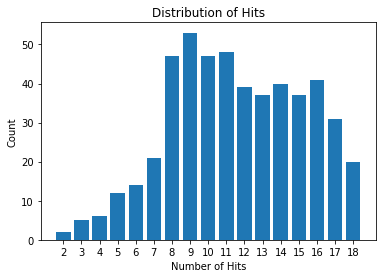

In [12]:
label = list(np.unique(df_clean.Hits))
counts = list(df_clean.Hits.value_counts().sort_index())

index = np.arange(len(label))
plt.bar(index, counts)
plt.xlabel('Number of Hits')
plt.ylabel('Count')
plt.xticks(index, label)
plt.title('Distribution of Hits')
plt.show()

In [13]:
df_clean.Hits.describe()

count    500.000000
mean      11.584000
std        3.654813
min        2.000000
25%        9.000000
50%       11.000000
75%       15.000000
max       18.000000
Name: Hits, dtype: float64

Obviously, this is neither a normal, much less uniform distribution. Because of the social circle bias, there are just a few people who scored less than 40%. From 8 to 16 the distribution is relatively balanced, with peaks around 45% to 60% score (8 to 11 Hits, evidenced by the mean of 11.58). From 16 and beyond performance drops significantly, as only 25% of the people scored at least 83% (15 Hits) and only 20 people (out of 500, or 4%) answered all questions correctly. Further studies must account for a more balanced distribution (i.e. spreading the questionnaire to different social groups), so each group can be better discriminated. For now, we will try to work around it, after all, this is the data we have collected.  

### Distributions for Easy, Medium and Hard questions <a class="anchor" id="2.2"></a>

Out of the 18 questions, we divided them in three groups: Easy, Medium and Hard, each with 6 questions. If they were chosen properly, we expect to see a decrease in performance with difficulty; if that's the case, it means that our questionnaire is well calibrated.

In [14]:
answers_easy = answers[0:6]
answers_medium = answers[6:12]
answers_hard = answers[12:]

right_easy = []
right_medium = []
right_hard = []

for i in range(0, len(dflist)):
    right_easy.append(len(set(dflist[i]) & set(answers_easy)))
    right_medium.append(len(set(dflist[i]) & set(answers_medium)))
    right_hard.append(len(set(dflist[i]) & set(answers_hard)))
    
df_clean['Hits_Easy'] = np.asarray(right_easy) #number of correct easy answers
df_clean['Hits_Medium'] = np.asarray(right_medium) #number of correct medium answers
df_clean['Hits_Hard'] = np.asarray(right_hard) #number of correct hard answers


df_clean[df_clean.columns[[1,2,3,4,5,6,-5,-4,-3,-2,-1]]]

,Age,Gender,Schooling,Father_Schooling,Mother_Schooling,Profession,Hits,Pct,Hits_Easy,Hits_Medium,Hits_Hard
1,14 to 17,F,Incomplete Higher,Complete Higher,Complete Higher,Student,17,0.94,5,6,6
2,35 to 44,M,Complete Higher,Complete ES,Complete HS,Professor,18,1.00,6,6,6
3,18 to 24,M,Incomplete Higher,Complete Higher,Complete Higher,Coach,10,0.56,4,2,4
4,18 to 24,O,Incomplete Higher,Complete Higher,Complete Higher,Student,17,0.94,6,5,6
6,18 to 24,M,Incomplete Higher,Complete Graduate,Complete Graduate,Astronomer,17,0.94,6,5,6
8,25 to 34,M,Incomplete Higher,Incomplete ES,Incomplete ES,Student,18,1.00,6,6,6
9,14 to 17,M,Incomplete Higher,Incomplete Higher,Incomplete Graduate,Others,18,1.00,6,6,6
10,14 to 17,F,Incomplete Higher,Complete Higher,Complete Graduate,Student,16,0.89,6,4,6
11,18 to 24,M,Incomplete Higher,Incomplete ES,Incomplete ES,Student,12,0.67,6,4,2
13,18 to 24,F,Incomplete Higher,Complete HS,Complete HS,Student,8,0.44,3,4,1


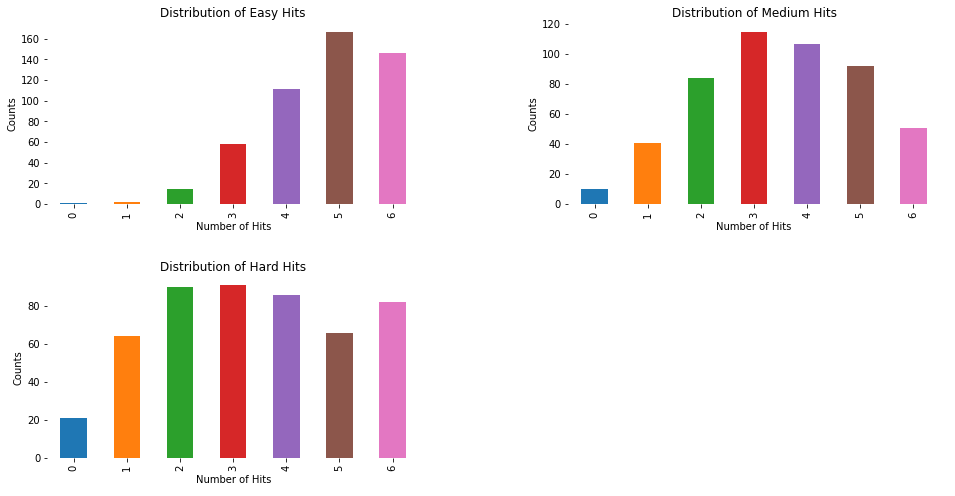

In [15]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 8))

df_clean['Hits_Easy'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('Distribution of Easy Hits')
df_clean['Hits_Medium'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('Distribution of Medium Hits')
df_clean['Hits_Hard'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('Distribution of Hard Hits')

for i in range(2):
    for j in range(2):
        axarr[i][j].set_ylabel('Counts')
        axarr[i][j].set_xlabel('Number of Hits')

axarr[1][1].axis('off')
plt.subplots_adjust(hspace=.4, wspace=.4)
sns.despine(bottom=True, left=True)

Well, overall, we got the calibration right! Most people got all or all but one of the Easy questions right, while for Medium, they tend to concentrate on the 3 or 4 Hits. Hard questions are a little more skewed to the left, with more occurences of 0, 1 and 2 Hits. However, it's interesting to note that more people hit all Hard questions than all Medium questions: this indicates an error of calibration; probably, at least one question classified as Hard is actualy Medium (or even Easy!), and at least one question classified as Medium is actualy Hard. All in all, this is a good way of checking if the questionnaire (be it about Astronomy, or any other subject) was well prepared. In our case, this is a very satisfying overview.

### Correlation between Hits and Level of Question <a class="anchor" id="2.3"></a>

As one more step of calibration, let's check the correlations between the number of Hits and the Level of the Question. If everything went right, we expect a greater correlation for Hard Hits and Number of Hits, as well as a bigger correlation between adjacent Levels (i.e. Hard questions must be more correlated with Medium, not Easy). These correlations (between the Levels) should be smaller than those between Hits and Level. Let's check if these assumptions are verified:

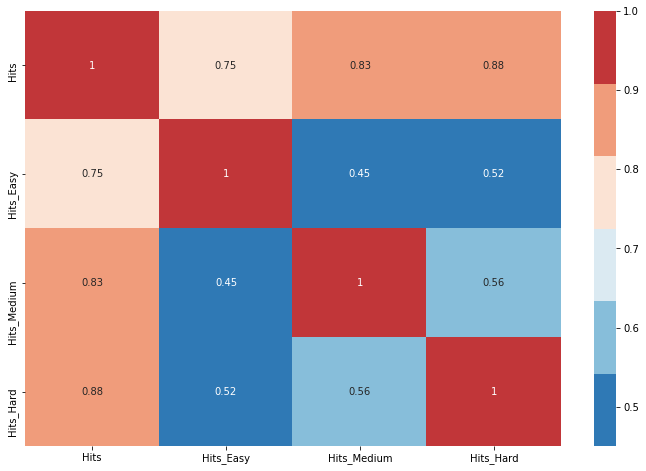

In [16]:
cens = df_clean[df_clean.columns[[-5,-3,-2,-1]]]
corr = cens.corr()

plt.figure(figsize=(12,8))
cmap = sns.color_palette('RdBu_r')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, annot=True)

plt.show()

That's exactly what happened! If you see the first line, Hits are more correlated (redder) as difficulty increases (and Hard has the greatest correlation value). Correlations between Levels are smaller (bluer), with the greatest being between Medium and Hard, and the smallest between Easy and Medium. Well done! It seems that, barring the misclassified Hard question, our calibration is fine!

### Demographic Distributions <a class="anchor" id="2.4"></a>

Now, enough of Hits and correlations. Let's take a first glance on the demographic data we collected (Age, Gender, Schooling, Parents' Schooling and Profession); then we will know what is the general profile of our sample and which biases they carry: it will be substantial for the rest of the analysis.

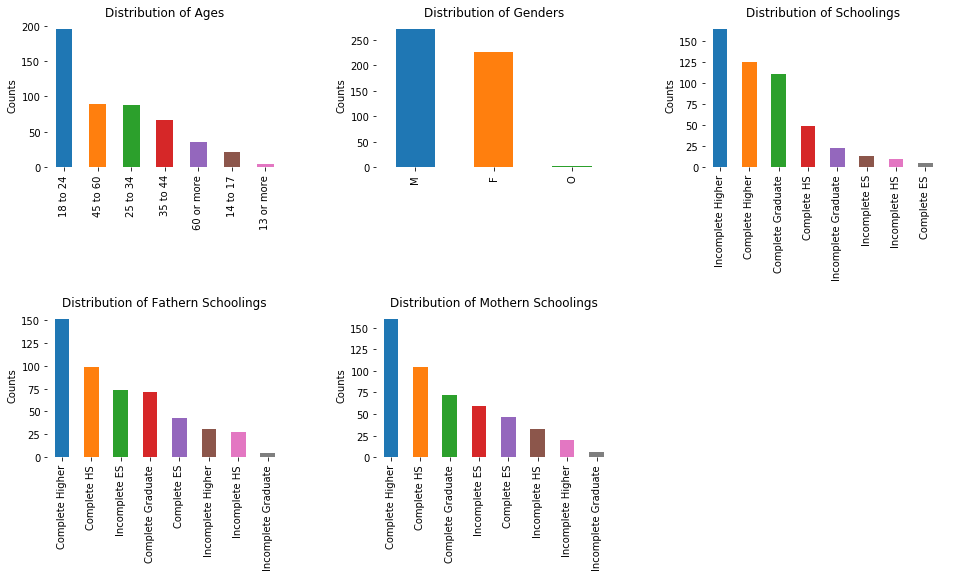

In [17]:
fig, axarr = plt.subplots(2, 3, figsize=(16, 8))

df_clean['Age'].value_counts().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('Distribution of Ages')
df_clean['Gender'].value_counts().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('Distribution of Genders')
df_clean['Schooling'].value_counts().plot.bar(ax=axarr[0][2])
axarr[0][2].set_title('Distribution of Schoolings')
df_clean['Father_Schooling'].value_counts().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('Distribution of Fathern Schoolings')
df_clean['Mother_Schooling'].value_counts().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title('Distribution of Mothern Schoolings')
axarr[1][2].axis('off')

for i in range(2):
    for j in range(3):
        axarr[i][j].set_ylabel('Counts')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

- Age: Since I'm a Student (as of 2018, 22 years old), this age group would obviously be dominant. The extremes are particularly worrisome: There are few people Over 60 and even fewer Teenagers; these groups will be hard to describe; 

- Gender: Looking pretty good. Nearly 50/50 (a little more men). Just 3 people did not identify themselves as Male or Female; the analysis of this population will have to be made by further studies;

- Schooling: Our public is clearly well-educated (the three dominant groups have, at least, Incomplete Higher); this also reflects, of course, the social medium I'm inserted into. With that said, the core of the analysis will be done on people with higher education; a deeper understing of lowly-educated people will stay for the future;

- Parents' Schooling: Interesting to note that both Mothern and Fathern Schooling distributions are basically the same; this means that they can be aggregated into only one feature. Here, most of the parents have a Higher degree, but there are many who have Incomplete Elementary School (lowest level of education). This analysis is going to be more solid.

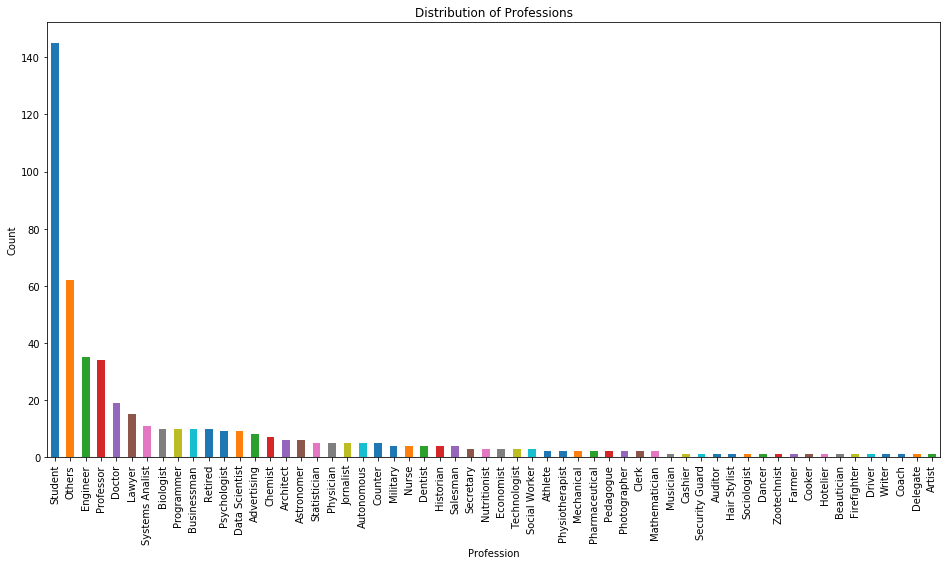

In [18]:
df_clean['Profession'].value_counts().plot.bar(figsize=(16,8))
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Distribution of Professions')
plt.show()

As expected, the dominant profession is Student. Even though I tried to be as specific as I could, still more than 60 people identified their profession as "Others". "Traditional carreers" such as Engineer, Professor, Doctor and Lawyer are well represented, but the professions are just too granular to take a conclusion. Once again, this analysis will have to be made by further studies with way more data.

### Distributions for each question <a class="anchor" id="2.5"></a>

Now let's take a look at each of the 18 questions, and see how was the overall performance (most of all, we are curious to see which wrong answers were chosen).

#### Easy

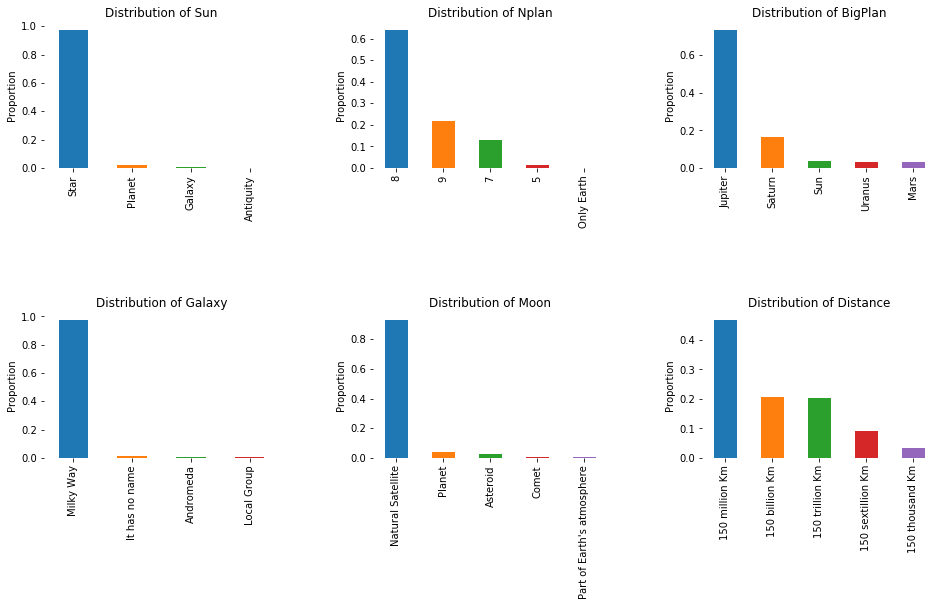

In [19]:
fig, axarr = plt.subplots(2, 3, figsize=(16, 8))

(df_clean['Sun'].value_counts()/len(df_clean)).plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('Distribution of Sun')
lb1 = [item.get_text() for item in axarr[0][0].get_xticklabels()]
lb1[3] = 'Antiquity'
axarr[0][0].set_xticklabels(lb1)

(df_clean['SS_Nplan'].value_counts()/len(df_clean)).plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('Distribution of Nplan')
lb2 = [item.get_text() for item in axarr[0][1].get_xticklabels()]
lb2[4] = 'Only Earth'
axarr[0][1].set_xticklabels(lb2)

(df_clean['SS_BigPlan'].value_counts()/len(df_clean)).plot.bar(ax=axarr[0][2])
axarr[0][2].set_title('Distribution of BigPlan')

(df_clean['Galaxy'].value_counts()/len(df_clean)).plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('Distribution of Galaxy')

(df_clean['Moon'].value_counts()/len(df_clean)).plot.bar(ax=axarr[1][1])
axarr[1][1].set_title('Distribution of Moon')

(df_clean['Distance'].value_counts()/len(df_clean)).plot.bar(ax=axarr[1][2])
axarr[1][2].set_title('Distribution of Distance')

for i in range(2):
    for j in range(3):
        axarr[i][j].set_ylabel('Proportion')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

The right question got the majority of answers for all Easy questions (with a very high hit rate for the name of our galaxy, what is the Sun and what is the Moon). Around 20% of people answered that there are 9 planets in our Solar System - Hello Pluto! About 20%, as well, said that the biggest planet of our system is Saturn, instead of Jupiter. However, only about a half of the respondents know the distance between the Earth and the Sun - the other half tended to overestimate it (billions, trillions and even sextillion Km!). This is a rather low hit rate for an easy question - instead, the distance question should be classified as Medium.

#### Medium

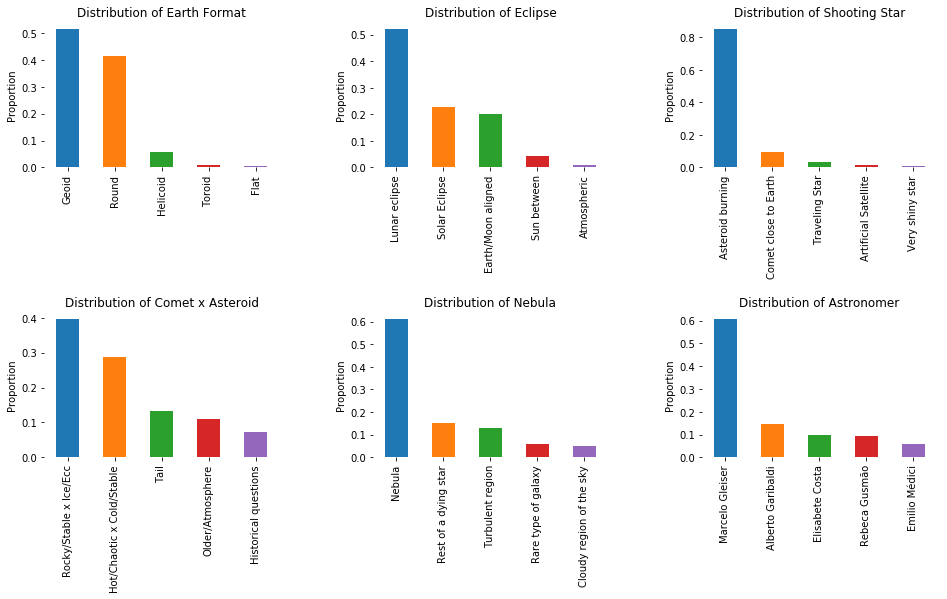

In [20]:
fig, axarr = plt.subplots(2, 3, figsize=(16, 8))

(df_clean['Earth_Format'].value_counts()/len(df_clean)).plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('Distribution of Earth Format')

(df_clean['Eclipse'].value_counts()/len(df_clean)).plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('Distribution of Eclipse')
axarr[0][1].set_xticklabels(['Lunar eclipse', 'Solar Eclipse', 'Earth/Moon aligned', 'Sun between', 'Atmospheric'])

(df_clean['Shooting_Star'].value_counts()/len(df_clean)).plot.bar(ax=axarr[0][2])
axarr[0][2].set_title('Distribution of Shooting Star')
lb3 = [item.get_text() for item in axarr[0][2].get_xticklabels()]
lb3[0] = 'Asteroid burning'
axarr[0][2].set_xticklabels(lb3)

(df_clean['Comet_Asteroid'].value_counts()/len(df_clean)).plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('Distribution of Comet x Asteroid')
axarr[1][0].set_xticklabels(['Rocky/Stable x Ice/Ecc', 'Hot/Chaotic x Cold/Stable', 'Tail', 'Older/Atmosphere', 
                             'Historical questions'])

(df_clean['Nebula'].value_counts()/len(df_clean)).plot.bar(ax=axarr[1][1])
axarr[1][1].set_title('Distribution of Nebula')
lb4 = [item.get_text() for item in axarr[1][1].get_xticklabels()]
lb4[0], lb4[2] = 'Nebula', 'Turbulent region'
axarr[1][1].set_xticklabels(lb4)

(df_clean['Astronomer'].value_counts()/len(df_clean)).plot.bar(ax=axarr[1][2])
axarr[1][2].set_title('Distribution of Astronomer')

for i in range(2):
    for j in range(3):
        axarr[i][j].set_ylabel('Proportion')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

Most people know what a Shooting Star is and also what a Nebula is. Also, more than half was able to identify the brazillian astronomer among 5 names (Marcelo Gleiser made his name with scientific outreach in TV, although many people don't know he is actually an astronomer. Alberto Garibaldi and Elisabete Costa are fake names, and were introduced to induce people to error - they were the two most answered alternatives after Gleiser. Emilio Médici was one of Brazil's presidents during Militar Dictatorship in the 70's, and Rebeca Gusmão is a swimmer. Similar questions for other fields of science can be formulated following this format). A considerable amount of people confused the explanation of a Lunar Eclipse with a Solar Eclipse, but two questions rose an alert: First, almost the same percentage asked that the Earth is Round rather than a Geoid; and less than half knows how to differentiate a comet from an asteroid. These two questions are our candidates for the one misclassified as Medium, when it was actually Hard.

#### Hard

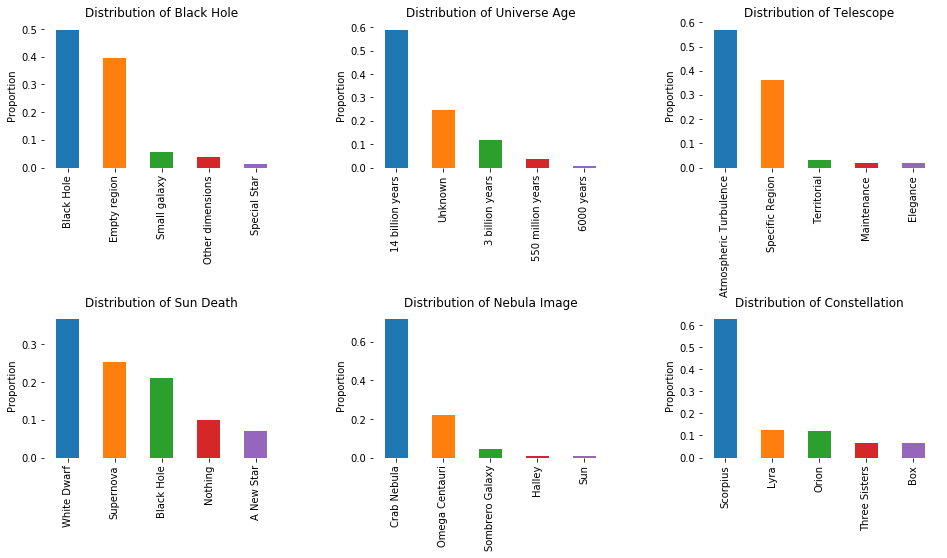

In [21]:
fig, axarr = plt.subplots(2, 3, figsize=(16, 8))

(df_clean['Black_Hole'].value_counts()/len(df_clean)).plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('Distribution of Black Hole')
axarr[0][0].set_xticklabels(['Black Hole', 'Empty region', 'Small galaxy', 'Other dimensions', 'Special Star'])

(df_clean['Universe_Age'].value_counts()/len(df_clean)).plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('Distribution of Universe Age')
lb5 = [item.get_text() for item in axarr[0][1].get_xticklabels()]
lb5[1] = 'Unknown'
axarr[0][1].set_xticklabels(lb5)

(df_clean['Telescope'].value_counts()/len(df_clean)).plot.bar(ax=axarr[0][2])
axarr[0][2].set_title('Distribution of Telescope')
axarr[0][2].set_xticklabels(['Atmospheric Turbulence', 'Specific Region', 'Territorial', 'Maintenance', 'Elegance'])

(df_clean['Sun_Death'].value_counts()/len(df_clean)).plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('Distribution of Sun Death')
lb6 = [item.get_text() for item in axarr[1][0].get_xticklabels()]
lb6[3] = 'Nothing'
axarr[1][0].set_xticklabels(lb6)

(df_clean['Nebula_Image'].value_counts()/len(df_clean)).plot.bar(ax=axarr[1][1])
axarr[1][1].set_title('Distribution of Nebula Image')

(df_clean['Constellation'].value_counts()/len(df_clean)).plot.bar(ax=axarr[1][2])
axarr[1][2].set_title('Distribution of Constellation')

for i in range(2):
    for j in range(3):
        axarr[i][j].set_ylabel('Proportion')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

The last two questions involved images and asked people to: identify which was the Nebula; correctly spot the Constellation with its name. They had a higher hit rate than expected, and thus are misclassified as Hard. Half of the people know our Universe's Age, although about a quarter thinks that the Universe Age is unknown. More than a third asked that the reason for telescopes being placed in space is that Earth-based telescopes can only cover a very tiny region of space, rather than atmospheric turbulence. Still, the two worst performance questions versed about the definition of a Black Hole (many fell to the misconception of an empty, massless, lightless region of space) and the fate of our Sun - way less than half answered that it will become a White Dwarf, with many answers to Supernova and Black Hole.

### Aggregating Demographic Data <a class="anchor" id="2.6"></a>

Before trying to model anything, we saw earlier that we have some really thin groups. First, let's agreggate some groups in order to have more balanced data.

#### Age

In [22]:
def agg_age(x):
    if x == '14 to 17' or x == '13 or more':
        x = 'Under 18'
    elif x == '25 to 34' or x == '35 to 44':
        x = '25 to 44'
    elif x == '45 to 60' or x == '60 or more':
        x = 'Over 45'
    return x

df_clean.Age = df_clean.Age.apply(agg_age)

df_clean.Age.value_counts()

18 to 24    195
25 to 44    155
Over 45     125
Under 18     25
Name: Age, dtype: int64

We still have very few Underage, but the others groups are much more balanced.

#### Schoolings

In [23]:
def agg_schooling(x):
    if x == 'Incomplete ES' or x == 'Complete ES':
        x = 'ES'
    elif x == 'Incomplete HS' or x == 'Complete HS':
        x = 'HS'
    elif x == 'Incomplete Higher' or x == 'Complete Higher':
        x = 'Higher'
    elif x == 'Incomplete Graduate' or x == 'Complete Graduate':
        x = 'Graduate'
    return x

df_clean.Schooling = df_clean.Schooling.apply(agg_schooling)
df_clean.Father_Schooling = df_clean.Father_Schooling.apply(agg_schooling)
df_clean.Mother_Schooling = df_clean.Mother_Schooling.apply(agg_schooling)

df_clean.Schooling.value_counts()

Higher      289
Graduate    134
HS           59
ES           18
Name: Schooling, dtype: int64

Higher Schooling is still dominant, but with fewer groups we can do a better analysis. Still, Elementary Schooling is very poorly represented.

#### Professions

In [24]:
def agg_profession(x):
    if x in ['Engineer', 'Systems Analist', 'Programmer', 'Data Scientist', 'Chemist', 'Astronomer', 'Physician',
            'Statistician', 'Technologist', 'Mathematician']:
        x = 'Exact'
    elif x in ['Doctor', 'Biologist', 'Nurse', 'Dentist', 'Nutritionist', 'Pharmaceutical', 'Physiotherapist',
              'Zootechnist', 'Beautician']:
        x = 'Biological'
    elif x in ['Professor', 'Lawyer', 'Businessman', 'Psychologist', 'Advertising', 'Architect', 'Counter', 
               'Jornalist', 'Salesman', 'Historian', 'Economist', 'Social Worker', 'Secretary', 'Mechanical',
              'Pedagogue', 'Clerk', 'Photographer', 'Athlete', 'Hotelier', 'Farmer', 'Cashier', 'Musician', 
              'Sociologist', 'Cooker', 'Artist', 'Writer', 'Dancer', 'Hair Stylist', 'Firefighter', 'Coach',
              'Delegate', 'Auditor', 'Security Guard', 'Driver']:
        x = 'Human'
    elif x in ['Others', 'Retired', 'Autonomous', 'Military']:
        x = random.choice(['Exact', 'Biological', 'Human'], )
    return x

df_clean.Profession = df_clean.Profession.apply(agg_profession)

df_clean.Profession.value_counts()

Human         162
Student       145
Exact         122
Biological     71
Name: Profession, dtype: int64

Aggregating according to area (Human, Biological, Human and Student) led to a very balanced dataset! It is important to note that there might be a little subjectivity in this aggregation (i.e. Psychologist is Human for some, but Biological to others). Also, some professions could not be fit easily within any of the 4 categories (Retired, Autonomous and Military) - they were randomly chosen to be Exact, Biological or Human. The same follows for "Others", which assumes that it is equally distributed between these three groups. In an ideal situation, this data would simply be dropped, but since our sample was already small, I didn't want to waste any more data.

#### Uniting Father and Mother Schooling

In [25]:
#function to convert schoolings to number, to compare which is higher
def school_convert(x):
    if x == 'Graduate':
        x = 4
    elif x == 'Higher':
        x = 3
    elif x == 'HS':
        x = 2
    elif x == 'ES':
        x = 1
    return x

#function to convert back to nominal values
def school_deconvert(x):
    if x == 4:
        x = 'Graduate'
    elif x == 3:
        x = 'Higher'
    elif x == 2:
        x = 'HS'
    elif x == 1:
        x = 'ES'
    return x

ft = df_clean.Father_Schooling.apply(school_convert).values
mt = df_clean.Mother_Schooling.apply(school_convert).values


new_school = np.maximum(ft, mt) #new array with the higher schooling from either father or mother

vschool_convert = np.vectorize(school_deconvert)
new_school = vschool_convert(new_school)

df_agg = df_clean.drop(['Father_Schooling', 'Mother_Schooling'], axis=1)

df_agg.insert(loc=4, column='Parents_Schooling', value=new_school)

df_agg.head(5)

,id,Age,Gender,Schooling,Parents_Schooling,Profession,Sun,SS_Nplan,SS_BigPlan,Galaxy,...,Universe_Age,Telescope,Sun_Death,Nebula_Image,Constellation,Hits,Pct,Hits_Easy,Hits_Medium,Hits_Hard
1,1.024865e+10,Under 18,F,Higher,Higher,Student,Star,8,Jupiter,Milky Way,...,14 billion years,Atmospheric Turbulence,White Dwarf,Crab Nebula,Scorpius,17,0.94,5,6,6
2,1.024844e+10,25 to 44,M,Higher,HS,Human,Star,8,Jupiter,Milky Way,...,14 billion years,Atmospheric Turbulence,White Dwarf,Crab Nebula,Scorpius,18,1.00,6,6,6
3,1.024772e+10,18 to 24,M,Higher,Higher,Human,Star,7,Jupiter,Milky Way,...,14 billion years,Atmospheric Turbulence,Supernova,Crab Nebula,Scorpius,10,0.56,4,2,4
4,1.024761e+10,18 to 24,O,Higher,Higher,Student,Star,8,Jupiter,Milky Way,...,14 billion years,Atmospheric Turbulence,White Dwarf,Crab Nebula,Scorpius,17,0.94,6,5,6
6,1.024708e+10,18 to 24,M,Higher,Graduate,Exact,Star,8,Jupiter,Milky Way,...,14 billion years,Atmospheric Turbulence,White Dwarf,Crab Nebula,Scorpius,17,0.94,6,5,6


Since we saw that Mothern and Fathern Schooling was very alike, I replaced these two features with a new one, "Parents Schooling", representing the higher level of education accquired by _any_ of the parents (so, if a Mother has Elementary Schooling and the Father has a Higher Schooling, "Parents Schooling" will be Higher Schooling).

#### Replot Demographic distributions, now aggregated

Now, let's replot the demographic data we just aggregated and see if it looks better:

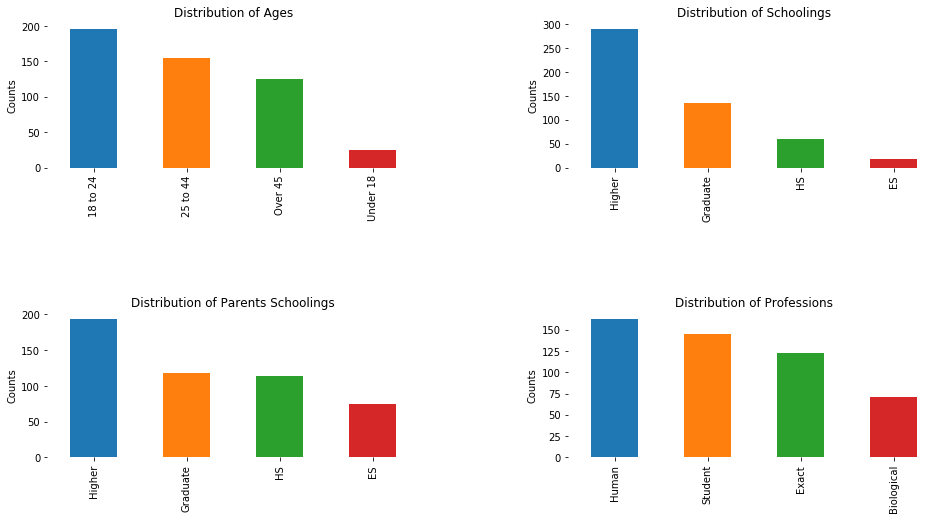

In [26]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 8))

df_agg['Age'].value_counts().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('Distribution of Ages')
df_agg['Schooling'].value_counts().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('Distribution of Schoolings')
df_agg['Parents_Schooling'].value_counts().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('Distribution of Parents Schoolings')
df_agg['Profession'].value_counts().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title('Distribution of Professions')


for i in range(2):
    for j in range(2):
        axarr[i][j].set_ylabel('Counts')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

Much better! Now, let's proceed to the hits per question:

### Hits per question, sorted in ascending order <a class="anchor" id="2.7"></a>

#### Creating data frame with binary answers (1 - correct, 0 - wrong)

In [27]:
df_ans = df_clean[df_clean.columns[[0,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]]

new_colnames = df_ans.columns[1:] + '_b'
i = 0

for col_old, col_new in zip(df_ans.columns[1:], new_colnames):
    df_ans[col_new] = df_ans[col_old].apply(lambda x: 1 if x == answers[i] else 0)
    i += 1

df_ans = df_ans[df_ans.columns[[0,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]]]


df_ans.columns = [c.strip('_b') for c in df_ans.columns]

df_ans

,id,Sun,SS_Nplan,SS_BigPlan,Galaxy,Moon,Distance,Earth_Format,Eclipse,Shooting_Star,Comet_Asteroid,Nebula,Astronomer,Black_Hole,Universe_Age,Telescope,Sun_Death,Nebula_Image,Constellation
1,1.024865e+10,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
2,1.024844e+10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1.024772e+10,1,0,1,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1
4,1.024761e+10,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
6,1.024708e+10,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
8,1.024696e+10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1.024689e+10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,1.024688e+10,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1
11,1.024686e+10,1,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,1,0
13,1.024682e+10,1,0,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1


Now we have a dataframe with columns of 1's (right answer) and 0's (wrong answers).

#### Now we can compute the hits per question

In [28]:
aux_val = []

for col in df_ans[df_ans.columns[1:]]:
    aux_val.append(round(df_ans[col].sum()/len(df_ans), 2))
    
colss = df_ans.columns[1:].tolist()  

d = {'Question': colss, 'Hits (%)': aux_val}

hits_df = pd.DataFrame(d).set_index('Question')

hits_df.sort_values(by='Hits (%)')

,Hits (%)
Question,
Sun_Death,0.37
Comet_Asteroid,0.40
Distance,0.47
Black_Hole,0.50
Earth_Format,0.51
Eclipse,0.52
Telescope,0.57
Universe_Age,0.59
Nebula,0.61


This sums the questions' distributions we just saw. 4 questions have a hit rate of 50% or below: What is a Black Hole, distance between Earth and Sun, difference between Comet and Asteroid, and the fate of the Sun (this has the lowest hit rate of all, 37%). Other 4 questions had a very good high rate (85% and above): What is a Shooting Star, what is the Moon, what is the Sun and the name of our Galaxy. While most of the questions stay in the 55-70% range, it's important to note that only 4 questions have a hit rate above 75% (that is, more than three quarters).

### Correlations between answers and between answers and number of hits <a class="anchor" id="2.8"></a>

As a last step of this initial exploration, we will look at the correlations between the answers and between each answer and the number of Hits. This way, we will se if we can capture some interesting relations:

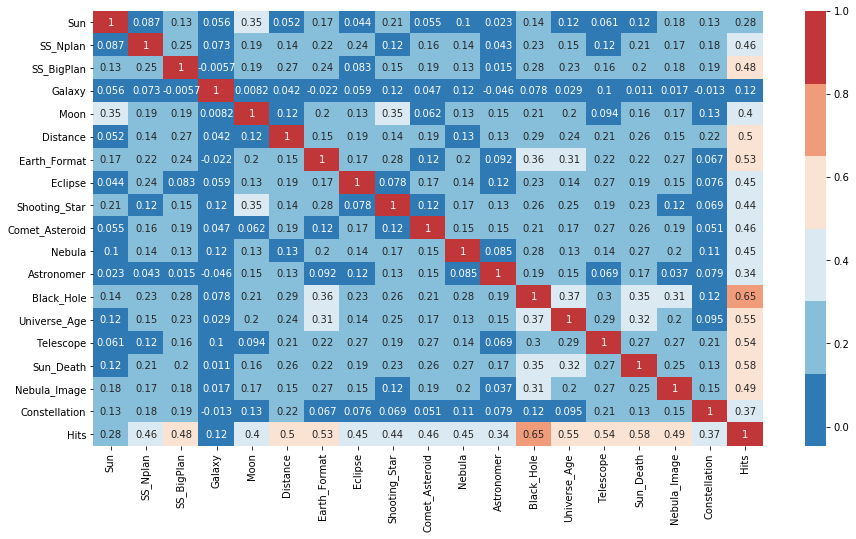

In [29]:
df_ans_full = df_ans.copy()

df_ans_full['Hits'] = df_clean['Hits']

corr2 = df_ans_full[df_ans_full.columns[1:]].corr()

plt.figure(figsize=(15,8))

cmap = sns.color_palette('RdBu_r')

sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns, cmap=cmap, annot=True)

plt.show()

- Between Hits and Questions: last line/last column. Redder cells mean that the question has a higher correlation with the number of Hits (that is, it is has more "influence" in the total number of questions answered right): the redder cell is "Black Hole", which means that this is the question that most influenced in a high Hit rate. High correlated questions are among which with the worst performance (Distance, Earth Format, Sun Death, Telescope, Universe Age). Here we can also get a better notion of the misclassifications: the Earth Format question has the highest correlation amongst Average questions, meaning that it is actually Hard; and we were in doubt if either the Nebula Image or Constellation match was the misclassified Hard question, but here we can see that it is the latter, since it is much less correlated (0.37 x 0.49) than the former - actually, its correlation is only higher than the two best performance questions (Sun and Galaxy) and the Astronomer question, meaning that most probably the Constellation question is rather Easy than Hard!


- Between Questions: the "core" of the diagram. We can see that there are no red cells, meaning that the correlations are not so strong (as expected). Dark blue cells have no correlation at all, so we are interested in the white cells, which have correlations in the range of 0.3-0.4 (weak correlation). The Black Hole question once again reveals its importance, since it is correlated with four other questions: Nebula Image, Universe Age, Sun Death and Earth Format. Speaking of, the question regarding the Earth Format is also correlated with the Universe Age question, meaning that it indeed belongs to the "Hard" class. Also, the greatest correlations are concentrated in the bottom right of the figure, region of the Hard questions - meaning that it is most likely that a person that hits a Hard question, hits another one (comparing to Average and Easy ones), apart from correlations between the Moon question and the Shooting Star and Sun questions. Once more, we can see the misclassification of the Constellation match question, since it is very weakly correlated with the other Hard questions.

## 3) Regression <a class="anchor" id="3"></a>

For the next step of our analysis, we will try to build a regression model that, given a person's demographic data, predicts how many questions will be hit. But first, we have to do some treatment:

### Dimensionality Reduction (PCA) <a class="anchor" id="3.1"></a>

Our goal here is to see if, reducing data to a plane, we can see clusters. If so, there should be clearly distinguishable groups that, when regression is applied, can lead to good results. But, since our data is all categorical, we will first One-Hot Encode it:

#### One-Hot Encoding of categorical features

In [30]:
dataset = df_agg[df_agg.columns[[0,1,2,3,4,5,-5]]] # only demographic data and Hits

#to apply PCA, categorical features must be One-Hot Encoded (Dummies)
dataset_dummies = pd.get_dummies(dataset, columns=['Age', 'Gender', 'Schooling', 'Parents_Schooling', 'Profession'], 
                                 drop_first=True)
dataset_dummies.head()

,id,Hits,Age_25 to 44,Age_Over 45,Age_Under 18,Gender_M,Gender_O,Schooling_Graduate,Schooling_HS,Schooling_Higher,Parents_Schooling_Graduate,Parents_Schooling_HS,Parents_Schooling_Higher,Profession_Exact,Profession_Human,Profession_Student
1,1.024865e+10,17,0,0,1,0,0,0,0,1,0,0,1,0,0,1
2,1.024844e+10,18,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,1.024772e+10,10,0,0,0,1,0,0,0,1,0,0,1,0,1,0
4,1.024761e+10,17,0,0,0,0,1,0,0,1,0,0,1,0,0,1
6,1.024708e+10,17,0,0,0,1,0,0,0,1,1,0,0,1,0,0


Now our inputs are all numerical. We are ready to split train-test sets (80-20) and apply PCA:

#### Splitting train/test sets

In [32]:
X = dataset_dummies.iloc[:, 2:].values
y = dataset_dummies.iloc[:, 1].values #target


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Applying PCA with 5 different Kernels

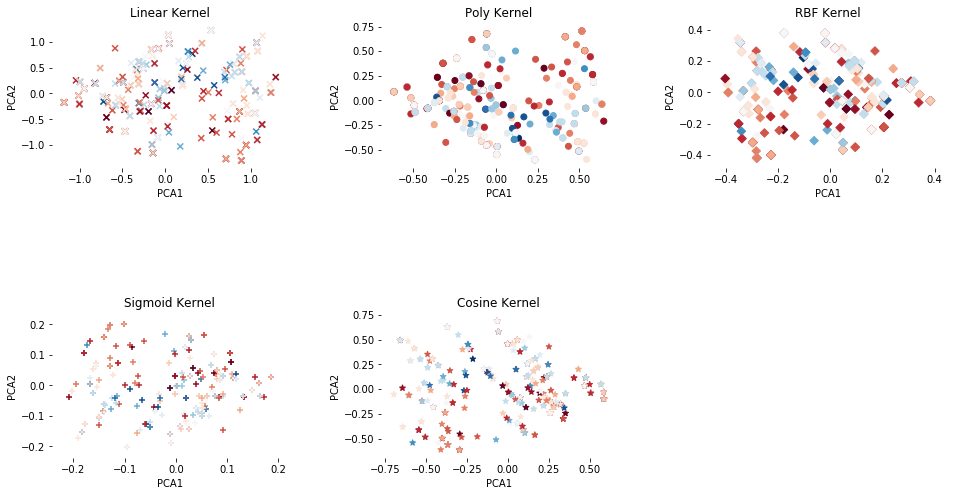

In [33]:
kpca = KernelPCA(n_components = 2, kernel = 'linear')
kpca_poly = KernelPCA(n_components = 2, kernel = 'poly')
kpca_rbf = KernelPCA(n_components = 2, kernel = 'rbf')
kpca_sig = KernelPCA(n_components = 2, kernel = 'sigmoid')
kpca_cos = KernelPCA(n_components = 2, kernel = 'cosine')

X_train_lin = kpca.fit_transform(X_train)
X_train_poly = kpca_poly.fit_transform(X_train)
X_train_rbf = kpca_rbf.fit_transform(X_train)
X_train_sig = kpca_sig.fit_transform(X_train)
X_train_cos = kpca_cos.fit_transform(X_train)

X_test_poly = kpca_sig.transform(X_test)

fig, axarr = plt.subplots(2, 3, figsize=(16, 8))

axarr[0][0].scatter(X_train_lin[:, 0], X_train_lin[:,1], marker='x', c=y_train, cmap='RdBu_r')
axarr[0][0].set_title('Linear Kernel')

axarr[0][1].scatter(X_train_poly[:, 0], X_train_poly[:,1], marker='o', c=y_train, cmap='RdBu_r')
axarr[0][1].set_title('Poly Kernel')

axarr[0][2].scatter(X_train_rbf[:, 0], X_train_rbf[:,1], marker='D', c=y_train, cmap='RdBu_r')
axarr[0][2].set_title('RBF Kernel')

axarr[1][0].scatter(X_train_sig[:, 0], X_train_sig[:,1], marker='+', c=y_train, cmap='RdBu_r')
axarr[1][0].set_title('Sigmoid Kernel')

axarr[1][1].scatter(X_train_cos[:, 0], X_train_cos[:,1], marker='*', c=y_train, cmap='RdBu_r')
axarr[1][1].set_title('Cosine Kernel')

axarr[1][2].axis('off')

for i in range(2):
    for j in range(3):
        axarr[i][j].set_xlabel('PCA1')
        axarr[i][j].set_ylabel('PCA2')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

We tried five different kernels in order to capture nonlinearities, but the result looks the same in all cases: a hot mess. Points are colored (blue to red) according to number of hits (the more red, the more hits), and we can see that there are no clear clusters in any case, and the colors are basically randomly scattered around the plane. This means that the features are too complex to be reduced to 2D and be clearly separable, which does not look good for our case. We will still try to do a Regression on the PCA1 and PCA2 axis, regardless.

### K-NN Regression <a class="anchor" id="3.2"></a>

Of all regression techniques available, we chose the K-NN (K-Nearest Neighbours) Regression, since we do not know clearly how our target relates to our features (i.e., if it's linear, polynomial, or has any tendency). Because the goal of the work is to spot patterns and groups, it makes sense to make predictions according to the closests "neighbours" in the dataset - basically, we are predicting how much a person will hit based on the average of the hits of the _k_ closest people projected to the 2D space (reduced by PCA). The whole idea behind this is that people with similar demographic data will have similar number of hits. A Decision Tree could have been used as well, but K-NN was chosen because it is more easily explained and fits better to our proposal. All right; so, as a first attempt, let's fit a K-NN Regressor considering the 2 closest neighbours to the Polynomial Kernel PCA (it could have been any of the others), plot the predicted x original scatter plot and measure the error:

In [34]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train_poly, y_train) 

y_pred = neigh.predict(X_test_poly)

### Plotting Predicted x Actual

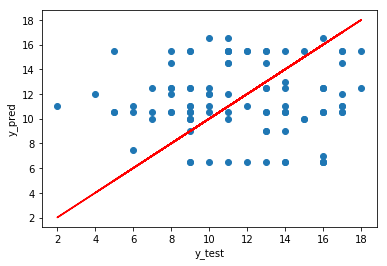

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.plot(y_test, y_test, c='red')
plt.show()

In [36]:
sqrt(mean_squared_error(y_test, y_pred))

4.631414470763764

Oh oh... Not looking good! If we had a perfect regressor, all points would fall in the red line (predicted = original); the more distant from the line, the greater the error. All in all, our predictor is doing a terrible job, since our mean error is close to 5: this means that if a person is predicted to score 13 points, it can actually have hit 18 (all right) or 9 (half)! We can't be sure of any of its predictions. Well, this was kind of predictable, since PCA could not distinguish groups, and neighbours apparently don't have relations between themselves. In sum, we have a GIGO model (Garbage In, Garbage Out) - but we chose a random kernel and fixed the number of neighbours to 2. Let's try to improve at least a little by running a Grid Search Pipeline with Kernel PCA + K-NN Regression, minimizing the Mean Squared Error: maybe there is some crazy configuration of parameters that best captures our features (who knows??)... Let's see!

### Grid Search (Pipeline PCA + K-NN Regression) <a class="anchor" id="3.3"></a>

In [37]:
# Define a pipeline to search for the best combination of kPCA and minimizing K-NN regression MSE.

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

neigh = KNeighborsRegressor()
kpca = KernelPCA()
pipe = Pipeline(steps=[('kpca', kpca), ('knn', neigh)])

# Parameters of pipeline:

param_grid = {
    'kpca__n_components': [2, 3],
    'kpca__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'cosine'],
    'kpca__gamma': [0.0001, 0.01, 1, 50, 500, 5000],
    'kpca__degree': [2,3,4],
    'knn__n_neighbors': [1,2,3,5,10,20],
    'knn__weights': ['uniform', 'distance'],
}

search = GridSearchCV(pipe, param_grid, cv=5, scoring=mse_scorer)
search.fit(X_train, y_train)
print("Best parameters (CV RMSE= %0.3f):" % sqrt(search.best_score_*-1))
print(search.best_params_)

Best parameters (CV RMSE= 3.559):
{'knn__n_neighbors': 20, 'knn__weights': 'uniform', 'kpca__degree': 3, 'kpca__gamma': 50, 'kpca__kernel': 'sigmoid', 'kpca__n_components': 3}


### Visualizing Grid Search Results

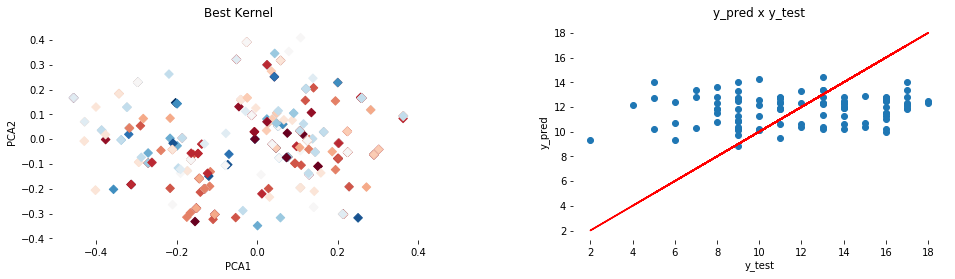

In [38]:
kpca_best = KernelPCA(n_components = 3, kernel='sigmoid', gamma=50, degree=3)
X_train = kpca_best.fit_transform(X_train)
X_test = kpca_best.transform(X_test)

neigh_best = KNeighborsRegressor(n_neighbors=20, weights='uniform')
neigh_best.fit(X_train, y_train) 
y_neigh_pred = neigh_best.predict(X_test)

fig, axarr = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)

axarr[0,0].scatter(X_train[:, 0], X_train[:,1], marker='D', c=y_train, cmap='RdBu_r')
axarr[0,0].set_title('Best Kernel')
axarr[0,0].set_xlabel('PCA1')
axarr[0,0].set_ylabel('PCA2')

axarr[0, 1].scatter(y_test, y_neigh_pred)
axarr[0, 1].set_title('y_pred x y_test')
axarr[0, 1].set_xlabel('y_test')
axarr[0, 1].set_ylabel('y_pred')
axarr[0, 1].plot(y_test, y_test, c='red')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

In [39]:
sqrt(mean_squared_error(y_test, y_neigh_pred))

3.628660221073337

There it is! From 4.6 to... 3.6... Well, it is still not good. kPCA still can't separate features (even though Grid Search actually found 3 components to be best, and we plotted the first 2), and the Regressor can't make good predictions. However, Grid Search can give us some insights: the best result came with the greatest number of neighbours (20), and we can see that the scatter plot is almost "horizontal". What is happening is that we are "predicting by the mode": the most frequent values are in the range 8-12, so, if a predictor always guesses the values within this range, it will end up minimizing the error: it will be smaller in the "core" of the sample, and greater in the tails, but, in average, it will be the best model. This means that it will have an error of about 2 for Average Hitters, but about 5 or 6 for Low and High Hitters. Also, the fact that Grid Search chose a high number of neighbours is another indicator that our features are not easily separable. 

Our Regression attempt failed; we do not have, with only 500 data points, the capability to build a Regressor with such granularity (also, the lack of Low Hitters is another huge problem): the best we can do is guess by the mode. Before we change our problem to a Classification task rather than Regression, let's first delve into data using a more sophisticated approach:

## 4) Finding Patterns <a class="anchor" id="4"></a>

### Change of Strategy: From Number of Hits to Groups of Hits

The first thing we are going to do is to not look at the number of Hits itself; rather, we will aggregate it into 4 groups:

- Low: 8 or less hits;
- Average: 9 to 12 hits;
- High: 13 to 15 hits;
- Very High: at least 16 hits

In [40]:
def group_hits(x):
    if x <= 8:
        x = 'Low'
    elif x >= 9 and x <= 12:
        x = 'Average'
    elif x >= 13 and x <= 15:
        x = 'High'
    elif x >= 16:
        x = 'Very High'
    return x

dataset.Hits = dataset.Hits.apply(group_hits)

dataset_dummies.Hits = dataset_dummies.Hits.apply(group_hits)

dataset.Hits.value_counts()

Average      187
High         114
Low          107
Very High     92
Name: Hits, dtype: int64

Now, even though the Average group is still dominant, each class has a decent representation, with the tails (Low and Very High) being less numerous.

### Profile based on Hit Group <a class="anchor" id="4.1"></a>

Now, let's take a look at the demographic data from each hit group, starting with the Low Hitters:

#### Low Hitters

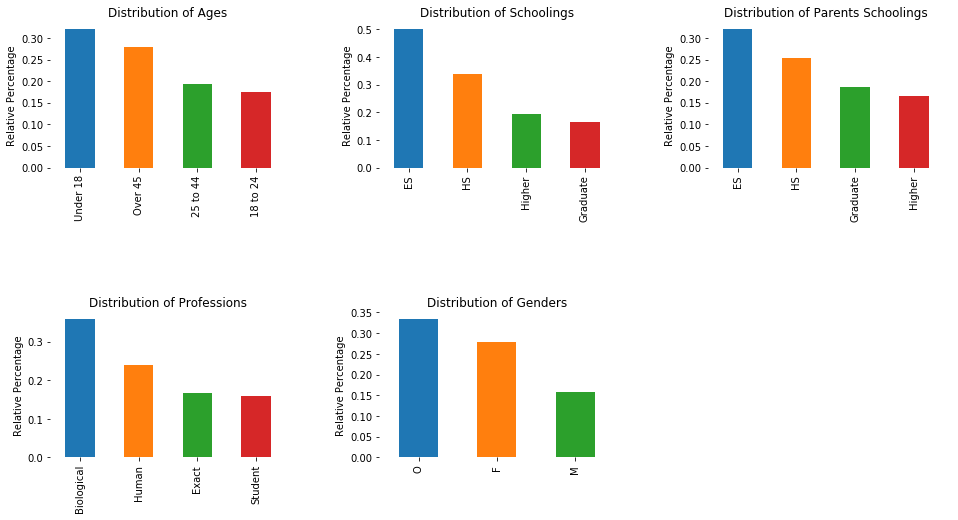

In [41]:
low_df = dataset[dataset.Hits == 'Low']
avg_df = dataset[dataset.Hits == 'Average']
high_df = dataset[dataset.Hits == 'High']
vhigh_df = dataset[dataset.Hits == 'Very High']

age_vc = dataset.Age.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
sch_vc = dataset.Schooling.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
parents_vc = dataset.Parents_Schooling.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
prof_vc = dataset.Profession.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
gen_vc = dataset.Gender.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')

age_vc_low = low_df.Age.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
sch_vc_low = low_df.Schooling.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
parents_vc_low = low_df.Parents_Schooling.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
prof_vc_low = low_df.Profession.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
gen_vc_low = low_df.Gender.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')

prop_age_low = age_vc_low/age_vc
prop_sch_low = sch_vc_low/sch_vc
prop_parents_low = parents_vc_low/parents_vc
prop_prof_low = prof_vc_low/prof_vc
prop_gen_low = gen_vc_low/gen_vc

fig, axarr = plt.subplots(2, 3, figsize=(16, 8))

prop_age_low.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][0], legend=False)
axarr[0][0].set_title('Distribution of Ages')
prop_sch_low.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][1], legend=False)
axarr[0][1].set_title('Distribution of Schoolings')
prop_parents_low.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][2], legend=False)
axarr[0][2].set_title('Distribution of Parents Schoolings')
prop_prof_low.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[1][0], legend=False)
axarr[1][0].set_title('Distribution of Professions')
prop_gen_low.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[1][1], legend=False)
axarr[1][1].set_title('Distribution of Genders')
axarr[1][2].axis('off')

for i in range(2):
    for j in range(3):
        axarr[i][j].set_ylabel('Relative Percentage')
        axarr[i][j].set_xlabel('')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

We can clearly see some patterns that led to Low hits: 
- Age: Under 18 and Over 45 (extremes) have a higher tendency to have low scores. Hence, people in the "student" age and on the adult phase are more likely to perform better;
- Schoolings: Well, as expected, people with lower educational level (Elementary and High School) tend to perform worse. The same holds for Parent's Schooling, although The Higher Schooling has a better performance than Graduate;
- Professions: Perhaps we expected Human Sciences to perform worse, since it is the less correlated to Astronomy; instead, Biological had the worst performance (over a third of such professionals being Low Hitters). Both Student and Exact had the best results, with only around 15% of Low Hitters;
- Gender: With only 3 data points of "Others", we can't tell if this result is significative. However, we can clearly see that Women tend to be Low Hitters almost as twice as Men (27% x 15%): this is obviously not a result of differences in intelligence or "fitness" for exact sciences, but rather of _cultural propagation_. This scenario has been changing over the past couple years, but brazillian society has historically followed the _patriarchy_, meaning that women did not receive incentive to pursue scientific careers, instead being relegated to housework. The result of this process can be seen in such a discrepancy between proportions of Low Hitters for each Gender. 

#### Average

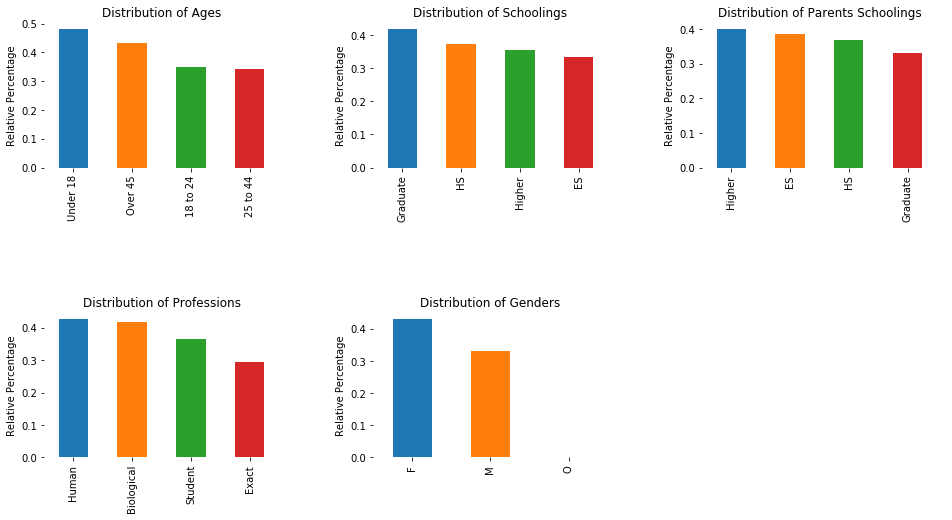

In [42]:
age_vc_avg = avg_df.Age.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
sch_vc_avg = avg_df.Schooling.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
parents_vc_avg = avg_df.Parents_Schooling.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
prof_vc_avg = avg_df.Profession.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
gen_vc_avg = avg_df.Gender.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')

prop_age_avg = age_vc_avg/age_vc
prop_sch_avg = sch_vc_avg/sch_vc
prop_parents_avg = parents_vc_avg/parents_vc
prop_prof_avg = prof_vc_avg/prof_vc
prop_gen_avg = gen_vc_avg/gen_vc

fig, axarr = plt.subplots(2, 3, figsize=(16, 8))

prop_age_avg.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][0], legend=False)
axarr[0][0].set_title('Distribution of Ages')
prop_sch_avg.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][1], legend=False)
axarr[0][1].set_title('Distribution of Schoolings')
prop_parents_avg.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][2], legend=False)
axarr[0][2].set_title('Distribution of Parents Schoolings')
prop_prof_avg.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[1][0], legend=False)
axarr[1][0].set_title('Distribution of Professions')
prop_gen_avg.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[1][1], legend=False)
axarr[1][1].set_title('Distribution of Genders')
axarr[1][2].axis('off')

for i in range(2):
    for j in range(3):
        axarr[i][j].set_ylabel('Relative Percentage')
        axarr[i][j].set_xlabel('')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

Here the distributions look more balanced, meaning that it is actually more or less "anyonye's guess" what is the profile of an Average Hitter. Still, the same trends from Low Hitters can still be spotted, although smoother (Extremes in Age, Human/Biological and Women). The only "unexpected" distribution observed is that the Graduate Schooling has the greater proportion of Average Hitters - hence, performance and schooling does not follow a perfect linear relationship (this is also linked to the fact that people with Graduate Schooling are also older, and older people are more related to Low Hitters: we are dealing, therefore, with a _mixed_ effect of this two features). 

#### High

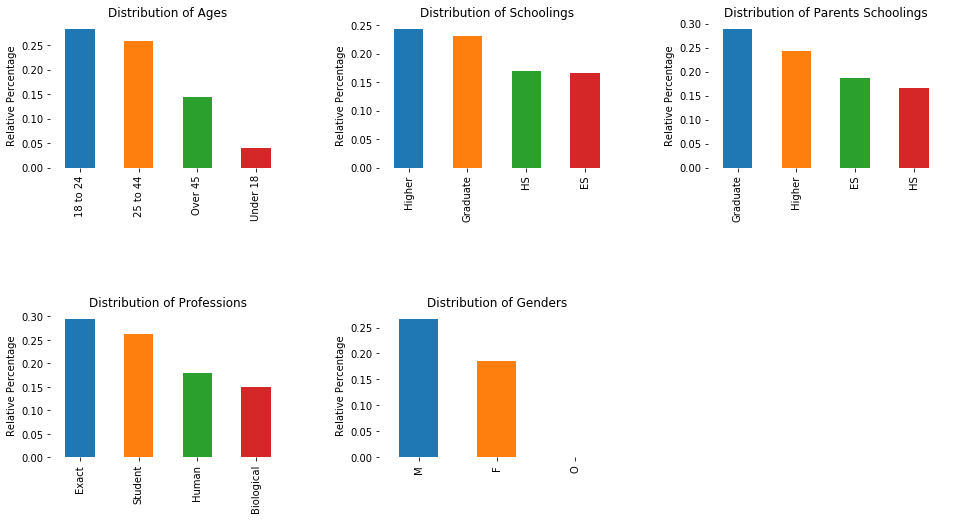

In [43]:
age_vc_high = high_df.Age.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
sch_vc_high = high_df.Schooling.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
parents_vc_high = high_df.Parents_Schooling.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
prof_vc_high = high_df.Profession.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
gen_vc_high = high_df.Gender.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')

prop_age_high = age_vc_high/age_vc
prop_sch_high = sch_vc_high/sch_vc
prop_parents_high = parents_vc_high/parents_vc
prop_prof_high = prof_vc_high/prof_vc
prop_gen_high = gen_vc_high/gen_vc

fig, axarr = plt.subplots(2, 3, figsize=(16, 8))

prop_age_high.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][0], legend=False)
axarr[0][0].set_title('Distribution of Ages')
prop_sch_high.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][1], legend=False)
axarr[0][1].set_title('Distribution of Schoolings')
prop_parents_high.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][2], legend=False)
axarr[0][2].set_title('Distribution of Parents Schoolings')
prop_prof_high.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[1][0], legend=False)
axarr[1][0].set_title('Distribution of Professions')
prop_gen_high.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[1][1], legend=False)
axarr[1][1].set_title('Distribution of Genders')
axarr[1][2].axis('off')

for i in range(2):
    for j in range(3):
        axarr[i][j].set_ylabel('Relative Percentage')
        axarr[i][j].set_xlabel('')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

This is basically the Low Hitters profile flipped. Younger People, tending to be of the Masculine Gender, with higher educational level, and working with Exact sciences or being a Student. 

#### Very High

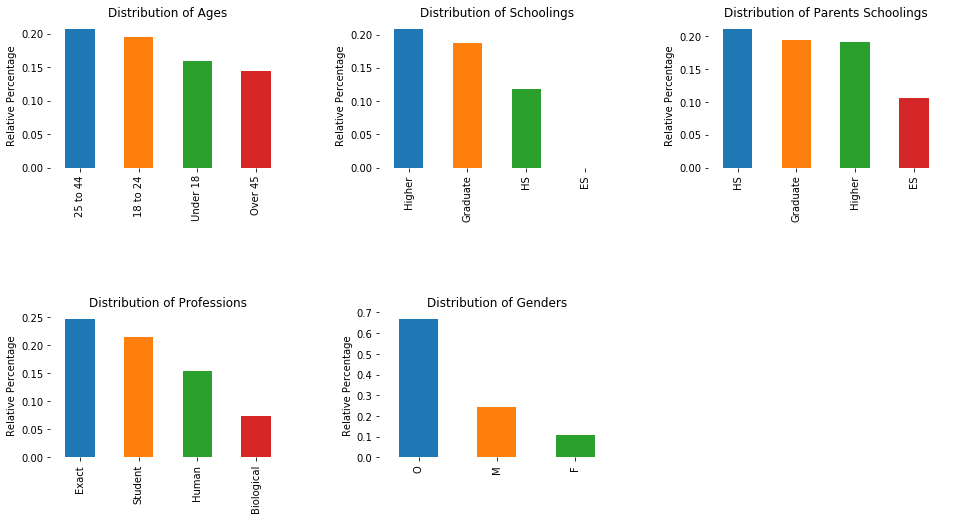

In [44]:
age_vc_vhigh = vhigh_df.Age.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
sch_vc_vhigh = vhigh_df.Schooling.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
parents_vc_vhigh = vhigh_df.Parents_Schooling.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
prof_vc_vhigh = vhigh_df.Profession.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')
gen_vc_vhigh = vhigh_df.Gender.value_counts().sort_index().rename_axis('unique_values').to_frame('counts')

prop_age_vhigh = age_vc_vhigh/age_vc
prop_sch_vhigh = sch_vc_vhigh/sch_vc
prop_parents_vhigh = parents_vc_vhigh/parents_vc
prop_prof_vhigh = prof_vc_vhigh/prof_vc
prop_gen_vhigh = gen_vc_vhigh/gen_vc

fig, axarr = plt.subplots(2, 3, figsize=(16, 8))

prop_age_vhigh.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][0], legend=False)
axarr[0][0].set_title('Distribution of Ages')
prop_sch_vhigh.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][1], legend=False)
axarr[0][1].set_title('Distribution of Schoolings')
prop_parents_vhigh.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[0][2], legend=False)
axarr[0][2].set_title('Distribution of Parents Schoolings')
prop_prof_vhigh.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[1][0], legend=False)
axarr[1][0].set_title('Distribution of Professions')
prop_gen_vhigh.sort_values(by='counts', ascending=False).plot.bar(y='counts', ax=axarr[1][1], legend=False)
axarr[1][1].set_title('Distribution of Genders')
axarr[1][2].axis('off')

for i in range(2):
    for j in range(3):
        axarr[i][j].set_ylabel('Relative Percentage')
        axarr[i][j].set_xlabel('')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

The same for Very High Hitters, with the caveat that the best performant age group is actually 25 to 44 ("Adult"), rather than "Student". Also, Graduate Schooling was not the best performant in neither own Schooling and parent's schooling, once again reflecting the nonlinearity of this feature with number of hits. 

### Multi-bar Chart on Demographic Data and Hit Groups <a class="anchor" id="4.2"></a>

We will basically see the same analysis, but this time aggregating every Hit Group for every Demographic Group in a Multi-bar Chart, starting with age:

#### Age

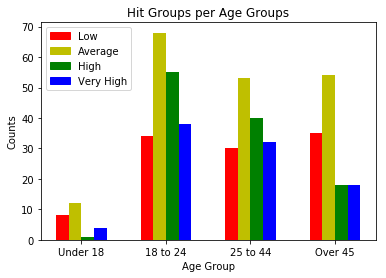

In [45]:
ages_order_list = ['Under 18', '18 to 24', '25 to 44', 'Over 45']
hits_order_list = ['Low', 'Average', 'High', 'Very High'] 

df_age = dataset.groupby(by=['Age', 'Hits']).agg('count').rename(columns={'id':'Counts'}) \
        .reindex(ages_order_list, level=0).reindex(hits_order_list, level=1).reset_index()[['Age', 'Hits', 'Counts']]

counts_age1 = df_age.Counts[[0,4,8,12]].values
counts_age2 = df_age.Counts[[1,5,9,13]].values
counts_age3 = df_age.Counts[[2,6,10,14]].values
counts_age4 = df_age.Counts[[3,7,11,15]].values
x = np.arange(len(counts_age1))

bar_width = 0.15

plt.bar(x, counts_age1, width=bar_width, color='r')
plt.bar(x+bar_width, counts_age2, width=bar_width, color='y')
plt.bar(x+bar_width*2, counts_age3, width=bar_width, color='g')
plt.bar(x+bar_width*3, counts_age4, width=bar_width, color='b')

plt.xticks (x+bar_width*1.5, ages_order_list)
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.title('Hit Groups per Age Groups')

low_patch = mpatches.Patch(label=hits_order_list[0], color='r')
avg_patch = mpatches.Patch(label=hits_order_list[1], color='y')
hg_patch = mpatches.Patch(label=hits_order_list[2], color='g', )
vhg_patch = mpatches.Patch(label=hits_order_list[3], color='b')
plt.legend(handles=[low_patch, avg_patch, hg_patch, vhg_patch])

plt.show()

We can see that the extremes (Under 18 and Over 45) are more skewed to the left (red), indicating more counts to Low Hits. Conversely, the Students and the Adults have more High/Very High counts then Low, even though "Average" is the predominant class for every group.

#### Schooling

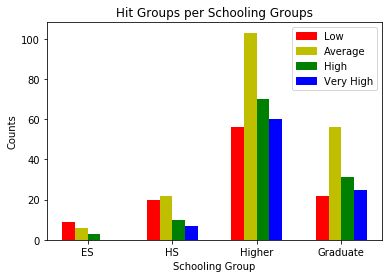

In [46]:
school_order_list = ['ES', 'HS', 'Higher', 'Graduate']

df_school = dataset.groupby(by=['Schooling', 'Hits']).agg('count').rename(columns={'id':'Counts'}) \
    .reindex(school_order_list, level=0).reindex(hits_order_list, level=1).reset_index()[['Schooling', 'Hits', 'Counts']]

counts_sch1 = df_school.Counts[[0,3,7,11]].values
counts_sch2 = df_school.Counts[[1,4,8,12]].values
counts_sch3 = df_school.Counts[[2,5,9,13]].values
counts_sch4 = df_school.Counts[[6,10,14]].values
counts_sch4 = np.insert(counts_sch4, 0, 0)

plt.bar(x, counts_sch1, width=bar_width, color='r')
plt.bar(x+bar_width, counts_sch2, width=bar_width, color='y')
plt.bar(x+bar_width*2, counts_sch3, width=bar_width, color='g')
plt.bar(x+bar_width*3, counts_sch4, width=bar_width, color='b')

plt.xticks (x+bar_width*1.5, school_order_list)
plt.xlabel('Schooling Group')
plt.ylabel('Counts')
plt.title('Hit Groups per Schooling Groups')

plt.legend(handles=[low_patch, avg_patch, hg_patch, vhg_patch])

plt.show()

Same trends spotted. Elementary and High School barely have Highs and Very Highs, whilst Higher and Graduate are pretty much identical and more skewed to the right (blue).

#### Parents Schooling

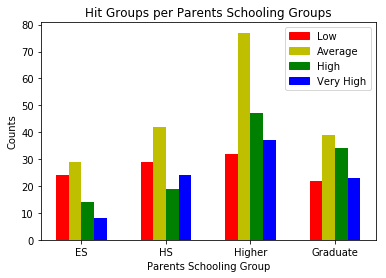

In [47]:
df_pschool = dataset.groupby(by=['Parents_Schooling', 'Hits']).agg('count').rename(columns={'id':'Counts'}) \
            .reindex(school_order_list, level=0).reindex(hits_order_list, level=1) \
            .reset_index()[['Parents_Schooling', 'Hits', 'Counts']]

counts_psch1 = df_pschool.Counts[[0,4,8,12]].values
counts_psch2 = df_pschool.Counts[[1,5,9,13]].values
counts_psch3 = df_pschool.Counts[[2,6,10,14]].values
counts_psch4 = df_pschool.Counts[[3,7,11,15]].values

plt.bar(x, counts_psch1, width=bar_width, color='r')
plt.bar(x+bar_width, counts_psch2, width=bar_width, color='y')
plt.bar(x+bar_width*2, counts_psch3, width=bar_width, color='g')
plt.bar(x+bar_width*3, counts_psch4, width=bar_width, color='b')

plt.xticks (x+bar_width*1.5, school_order_list)
plt.xlabel('Parents Schooling Group')
plt.ylabel('Counts')
plt.title('Hit Groups per Parents Schooling Groups')

plt.legend(handles=[low_patch, avg_patch, hg_patch, vhg_patch])

plt.show()

High Schooled parents have more Very High Hitters than High Hitters (just a sample peculiarity?); Graduate schooled parents have a closer Average-to-High ratio, but also display the same proportion of Low and Very High Hitters. This schooling group is, indeed, pretty intricate.

#### Gender

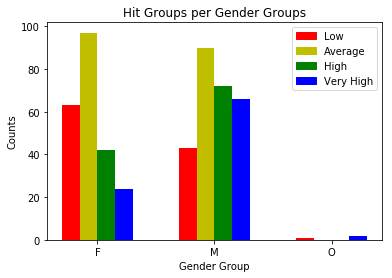

In [48]:
df_gen = dataset.groupby(by=['Gender', 'Hits']).agg('count').rename(columns={'id':'Counts'}) \
            .reindex(hits_order_list, level=1).reset_index()[['Gender', 'Hits', 'Counts']]

counts_gen1 = df_gen.Counts[[0,4,8]].values
counts_gen2 = df_gen.Counts[[1,5]].values
counts_gen3 = df_gen.Counts[[2,6]].values
counts_gen4 = df_gen.Counts[[3,7,9]].values
counts_gen2 = np.insert(counts_gen2, 2, 0)
counts_gen3 = np.insert(counts_gen3, 2, 0)
x2 = np.arange(len(counts_gen1))

plt.bar(x2, counts_gen1, width=bar_width, color='r')
plt.bar(x2+bar_width, counts_gen2, width=bar_width, color='y')
plt.bar(x2+bar_width*2, counts_gen3, width=bar_width, color='g')
plt.bar(x2+bar_width*3, counts_gen4, width=bar_width, color='b')

plt.xticks (x2+bar_width*1.5, ['F', 'M', 'O'])
plt.xlabel('Gender Group')
plt.ylabel('Counts')
plt.title('Hit Groups per Gender Groups')

plt.legend(handles=[low_patch, avg_patch, hg_patch, vhg_patch])

plt.show()

Huge difference! Clearly, Women are way more skewed to Low Hitters, while Men have a much higher ratio of High and Very High Hitters. 

#### Profession

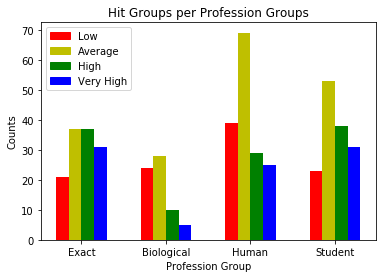

In [49]:
prof_order_list = ['Exact', 'Biological', 'Human', 'Student']

df_prof = dataset.groupby(by=['Profession', 'Hits']).agg('count').rename(columns={'id':'Counts'}) \
            .reindex(prof_order_list, level=0).reindex(hits_order_list, level=1) \
            .reset_index()[['Profession', 'Hits', 'Counts']]

counts_prof1 = df_prof.Counts[[0,4,8,12]].values
counts_prof2 = df_prof.Counts[[1,5,9,13]].values
counts_prof3 = df_prof.Counts[[2,6,10,14]].values
counts_prof4 = df_prof.Counts[[3,7,11,15]].values

plt.bar(x, counts_prof1, width=bar_width, color='r')
plt.bar(x+bar_width, counts_prof2, width=bar_width, color='y')
plt.bar(x+bar_width*2, counts_prof3, width=bar_width, color='g')
plt.bar(x+bar_width*3, counts_prof4, width=bar_width, color='b')

plt.xticks (x+bar_width*1.5, prof_order_list)
plt.xlabel('Profession Group')
plt.ylabel('Counts')
plt.title('Hit Groups per Profession Groups')

plt.legend(handles=[low_patch, avg_patch, hg_patch, vhg_patch])

plt.show()

Exact professionals have the highest High and Very High ratio (actually High equals Average). Biological, on the other hand, has almost as many Low Hitters as Average Hitters, and way less High/Very High Hitters - an awful performance. Human professionals are skewed to the left, while Students are skewed to the right.

Done with the bar-charts. Let's run an association rule and see if the rules found tell a different story:

### Association Rule <a class="anchor" id="4.3"></a>

To run an Association Rule algorithm (Apriori), we must first one-hot encode all features. Then, our first step is to one-hot encode the Hits as well.

In [50]:
df_ar = pd.get_dummies(dataset).set_index('id')

df_ar.head(3)

,Age_18 to 24,Age_25 to 44,Age_Over 45,Age_Under 18,Gender_F,Gender_M,Gender_O,Schooling_ES,Schooling_Graduate,Schooling_HS,...,Parents_Schooling_HS,Parents_Schooling_Higher,Profession_Biological,Profession_Exact,Profession_Human,Profession_Student,Hits_Average,Hits_High,Hits_Low,Hits_Very High
id,,,,,,,,,,,,,,,,,,,,,
1.024865e+10,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1.024844e+10,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1.024772e+10,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [51]:
frequent_itemsets = apriori(df_ar, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_18 to 24),(Gender_M),0.390,0.542,0.248,0.635897,1.173243,0.03662,1.257887
1,(Gender_M),(Age_18 to 24),0.542,0.390,0.248,0.457565,1.173243,0.03662,1.124558
2,(Age_18 to 24),(Schooling_HS),0.390,0.118,0.054,0.138462,1.173403,0.00798,1.023750
3,(Schooling_HS),(Age_18 to 24),0.118,0.390,0.054,0.457627,1.173403,0.00798,1.124688
4,(Age_18 to 24),(Schooling_Higher),0.390,0.578,0.332,0.851282,1.472806,0.10658,2.837586


That's great! But we are only interested in the rules in which the consequents are the Hits. Let's filter the rules dataframe by those consequents, sort by lift and see if we can identify some interesting associations!

In [52]:
pd.options.display.max_colwidth = 100

rules_hits = rules[ (rules['consequents'] == {'Hits_Low'}) |
                  ( rules['consequents'] == {'Hits_Average'}) |
                  ( rules['consequents'] == {'Hits_High'}) |
                  ( rules['consequents'] == {'Hits_Very High'}) ]

rules_hits.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5046,"(Age_Over 45, Schooling_HS, Gender_F)",(Hits_Low),0.016,0.214,0.012,0.750000,3.504673,0.008576,3.144
11502,"(Age_Over 45, Schooling_HS, Gender_F, Parents_Schooling_ES)",(Hits_Low),0.014,0.214,0.010,0.714286,3.337784,0.007004,2.751
5846,"(Age_Over 45, Schooling_HS, Parents_Schooling_ES)",(Hits_Low),0.020,0.214,0.014,0.700000,3.271028,0.009720,2.620
4770,"(Age_25 to 44, Profession_Student, Schooling_Higher)",(Hits_High),0.014,0.228,0.010,0.714286,3.132832,0.006808,2.702
6496,"(Parents_Schooling_ES, Schooling_HS, Gender_F)",(Hits_Low),0.018,0.214,0.012,0.666667,3.115265,0.008148,2.358
939,"(Age_Over 45, Schooling_HS)",(Hits_Low),0.024,0.214,0.016,0.666667,3.115265,0.010864,2.358
12162,"(Profession_Human, Gender_F, Parents_Schooling_Graduate, Schooling_Higher)",(Hits_Low),0.016,0.214,0.010,0.625000,2.920561,0.006576,2.096
10446,"(Profession_Biological, Age_25 to 44, Gender_F, Schooling_Higher)",(Hits_Low),0.016,0.214,0.010,0.625000,2.920561,0.006576,2.096
11322,"(Age_Over 45, Schooling_Graduate, Parents_Schooling_HS, Gender_F)",(Hits_Low),0.016,0.214,0.010,0.625000,2.920561,0.006576,2.096
6154,"(Schooling_ES, Gender_M, Age_Under 18)",(Hits_Low),0.016,0.214,0.010,0.625000,2.920561,0.006576,2.096


Those are the top 10 rules we found! Interesting enough, 9 of them are related to Low Hitters, and 1 to High Hitters. So now let's analyze the top rules for each type of Hitter, one at a time.

#### Low Hitters

In [53]:
rules_hits[(rules_hits['consequents'] == {'Hits_Low'})].sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5046,"(Age_Over 45, Schooling_HS, Gender_F)",(Hits_Low),0.016,0.214,0.012,0.750000,3.504673,0.008576,3.1440
11502,"(Age_Over 45, Schooling_HS, Gender_F, Parents_Schooling_ES)",(Hits_Low),0.014,0.214,0.010,0.714286,3.337784,0.007004,2.7510
5846,"(Age_Over 45, Schooling_HS, Parents_Schooling_ES)",(Hits_Low),0.020,0.214,0.014,0.700000,3.271028,0.009720,2.6200
6496,"(Parents_Schooling_ES, Schooling_HS, Gender_F)",(Hits_Low),0.018,0.214,0.012,0.666667,3.115265,0.008148,2.3580
939,"(Age_Over 45, Schooling_HS)",(Hits_Low),0.024,0.214,0.016,0.666667,3.115265,0.010864,2.3580
6154,"(Schooling_ES, Gender_M, Age_Under 18)",(Hits_Low),0.016,0.214,0.010,0.625000,2.920561,0.006576,2.0960
12162,"(Profession_Human, Gender_F, Parents_Schooling_Graduate, Schooling_Higher)",(Hits_Low),0.016,0.214,0.010,0.625000,2.920561,0.006576,2.0960
10446,"(Profession_Biological, Age_25 to 44, Gender_F, Schooling_Higher)",(Hits_Low),0.016,0.214,0.010,0.625000,2.920561,0.006576,2.0960
11322,"(Age_Over 45, Schooling_Graduate, Parents_Schooling_HS, Gender_F)",(Hits_Low),0.016,0.214,0.010,0.625000,2.920561,0.006576,2.0960
1865,"(Parents_Schooling_ES, Schooling_HS)",(Hits_Low),0.026,0.214,0.016,0.615385,2.875629,0.010436,2.0436


The rules once again confirmed the profiles we discovered looking the distributions: looking at the 10 strongest rules, we can identify some previously explored features such as: High School Schooling, Biological Profession, Feminine Gender, Age Over 45 and Under 18, and Parents' Elementary Schooling. Also, the second strongest rule reinforces what we hypothesized about the patriarchy: Women Over 45 years old, without Superior Degree, have a strong tendency to be Low Hitters. In fact, 6 of the top 10 rules include Women, but also interesting to see is the 6th, relating Under Age Boys to Low hits, rather than girls (could this be an indicative of change?). 

#### Average Hitters

In [54]:
rules_hits[(rules_hits['consequents'] == {'Hits_Average'})].sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11126,"(Age_25 to 44, Schooling_Graduate, Parents_Schooling_HS, Profession_Human)",(Hits_Average),0.014,0.374,0.012,0.857143,2.291826,0.006764,4.3820
12016,"(Schooling_Graduate, Parents_Schooling_HS, Gender_F, Profession_Human)",(Hits_Average),0.014,0.374,0.012,0.857143,2.291826,0.006764,4.3820
12047,"(Profession_Biological, Schooling_Graduate, Gender_F, Parents_Schooling_Higher)",(Hits_Average),0.018,0.374,0.014,0.777778,2.079620,0.007268,2.8170
1161,"(Schooling_HS, Age_Under 18)",(Hits_Average),0.016,0.374,0.012,0.750000,2.005348,0.006016,2.5040
6223,"(Profession_Student, Schooling_HS, Age_Under 18)",(Hits_Average),0.016,0.374,0.012,0.750000,2.005348,0.006016,2.5040
6404,"(Profession_Biological, Schooling_Graduate, Gender_F)",(Hits_Average),0.036,0.374,0.026,0.722222,1.931075,0.012536,2.2536
7925,"(Schooling_Graduate, Parents_Schooling_HS, Profession_Human)",(Hits_Average),0.028,0.374,0.020,0.714286,1.909855,0.009528,2.1910
13359,"(Profession_Biological, Age_Over 45, Schooling_Graduate, Gender_F, Parents_Schooling_Higher)",(Hits_Average),0.014,0.374,0.010,0.714286,1.909855,0.004764,2.1910
11958,"(Profession_Biological, Age_Over 45, Parents_Schooling_HS, Schooling_Higher)",(Hits_Average),0.014,0.374,0.010,0.714286,1.909855,0.004764,2.1910
11383,"(Age_Over 45, Schooling_Graduate, Gender_F, Parents_Schooling_Higher)",(Hits_Average),0.026,0.374,0.018,0.692308,1.851090,0.008276,2.0345


This group is harder to identify, but the second rule says that Adult Women with a Graduate Degree, working with Human Sciences, tend to be Average Hitters. In fact, it appears that the strongest rules for Average Hitters are related to Graduate Schooling and Biological/Human Profession. Still, it remains a muddy terrain.

#### High Hitters

In [55]:
rules_hits[(rules_hits['consequents'] == {'Hits_High'})].sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4770,"(Age_25 to 44, Profession_Student, Schooling_Higher)",(Hits_High),0.014,0.228,0.010,0.714286,3.132832,0.006808,2.702000
786,"(Age_25 to 44, Profession_Student)",(Hits_High),0.016,0.228,0.010,0.625000,2.741228,0.006352,2.058667
12368,"(Gender_M, Parents_Schooling_Graduate, Schooling_Higher, Profession_Exact)",(Hits_High),0.024,0.228,0.014,0.583333,2.558480,0.008528,1.852800
7897,"(Schooling_Graduate, Parents_Schooling_Graduate, Profession_Human)",(Hits_High),0.022,0.228,0.012,0.545455,2.392344,0.006984,1.698400
13001,"(Age_18 to 24, Schooling_Higher, Gender_M, Profession_Exact, Parents_Schooling_Higher)",(Hits_High),0.022,0.228,0.012,0.545455,2.392344,0.006984,1.698400
10082,"(Parents_Schooling_Higher, Age_18 to 24, Schooling_Higher, Profession_Exact)",(Hits_High),0.026,0.228,0.014,0.538462,2.361673,0.008072,1.672667
8085,"(Parents_Schooling_Graduate, Schooling_Higher, Profession_Exact)",(Hits_High),0.036,0.228,0.018,0.500000,2.192982,0.009792,1.544000
3334,"(Parents_Schooling_Graduate, Age_18 to 24, Profession_Exact)",(Hits_High),0.020,0.228,0.010,0.500000,2.192982,0.005440,1.544000
3431,"(Profession_Exact, Age_18 to 24, Parents_Schooling_Higher)",(Hits_High),0.028,0.228,0.014,0.500000,2.192982,0.007616,1.544000
9408,"(Gender_M, Age_18 to 24, Schooling_Higher, Profession_Exact)",(Hits_High),0.044,0.228,0.022,0.500000,2.192982,0.011968,1.544000


The top rule is an adult Student with a Higher degree. The second one is the same, but without the degree. Masculine Gender appears in 3 rules, and Exact Profession in nothing less than 7! Another recurrent feature is Student age (18 to 24), which appears in 5 rules.

#### Very High Hitters

In [56]:
rules_hits[(rules_hits['consequents'] == {'Hits_Very High'})].sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11013,"(Age_25 to 44, Profession_Human, Schooling_Higher, Gender_M)",(Hits_Very High),0.024,0.184,0.012,0.500000,2.717391,0.007584,1.632000
10651,"(Age_25 to 44, Schooling_Graduate, Parents_Schooling_Graduate, Gender_M)",(Hits_Very High),0.024,0.184,0.010,0.416667,2.264493,0.005584,1.398857
12428,"(Profession_Human, Parents_Schooling_HS, Schooling_Higher, Gender_M)",(Hits_Very High),0.024,0.184,0.010,0.416667,2.264493,0.005584,1.398857
5573,"(Age_Over 45, Gender_M, Parents_Schooling_Higher)",(Hits_Very High),0.036,0.184,0.014,0.388889,2.113527,0.007376,1.335273
12938,"(Parents_Schooling_HS, Age_18 to 24, Schooling_Higher, Gender_M, Profession_Student)",(Hits_Very High),0.026,0.184,0.010,0.384615,2.090301,0.005216,1.326000
5997,"(Age_Over 45, Schooling_Higher, Profession_Exact)",(Hits_Very High),0.026,0.184,0.010,0.384615,2.090301,0.005216,1.326000
10947,"(Age_25 to 44, Gender_M, Schooling_Higher, Parents_Schooling_Higher)",(Hits_Very High),0.026,0.184,0.010,0.384615,2.090301,0.005216,1.326000
8194,"(Profession_Human, Parents_Schooling_HS, Schooling_Higher)",(Hits_Very High),0.032,0.184,0.012,0.375000,2.038043,0.006112,1.305600
7694,"(Profession_Human, Parents_Schooling_Graduate, Gender_M)",(Hits_Very High),0.032,0.184,0.012,0.375000,2.038043,0.006112,1.305600
7100,"(Schooling_Graduate, Parents_Schooling_Graduate, Gender_M)",(Hits_Very High),0.032,0.184,0.012,0.375000,2.038043,0.006112,1.305600


For as much as Exact profession was more performant, the top rule for Very High Hitters include Adult Men with Higher education and _Human_ profession! In fact, Human profession appears in 2 of the top 3 rules and once more, while Exact and Student appear once each in the top 10. And while High Hitters are related to Students, Very High Hitters are more related to Adults, which appear in half of the rules. The Gender discrimination is even more obvious, as all but two rules included Masculine Gender. All in all, it appears that Human professionals have "two opposite faces": Old women who are Low Hitters, and adult men that are Very High Hitters. Just like Schooling, Profession seemed to have a linear relationship with the number of hits, but it is actually more complex than that, when we _mix in_ other features (such as Age and Gender): now it is easier to comprehend why kPCA and K-NN Regression didn't do a great job!

### Correlations between answers and Demographic Profile <a class="anchor" id="4.4"></a>

Back to the correlations. Now let's analyze the questions itselves and each demographic feature, to see if there are any patterns; starting with age:

#### Age

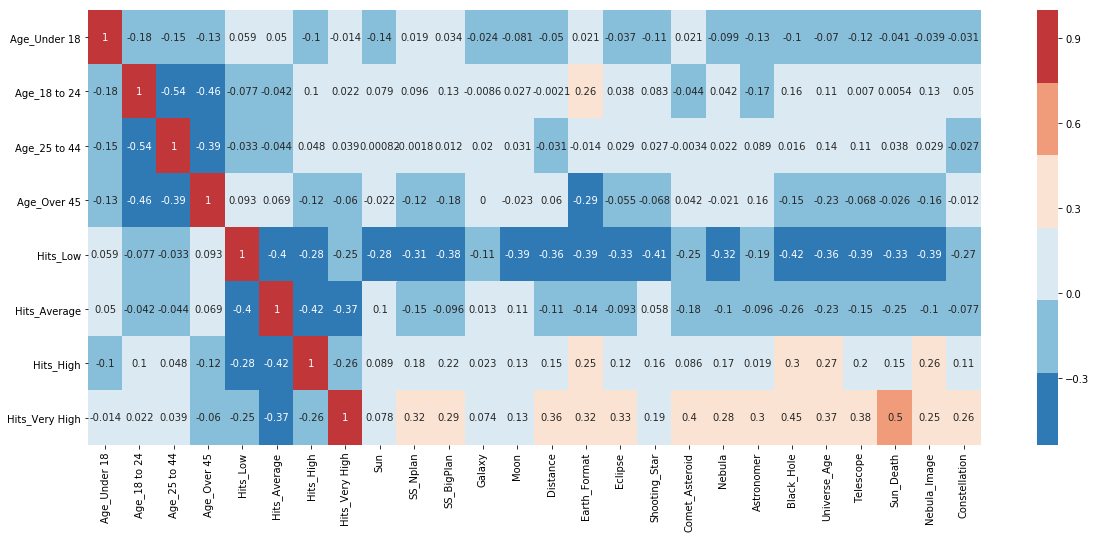

In [57]:
df_ans_full = df_ar.join(df_ans.set_index('id'))

df_age_full = df_ans_full[df_ans_full.columns[[0,1,2,3,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,
                                               34,35,36,37,38,39,40]]]

cols_age = ['Age_Under 18', 'Age_18 to 24', 'Age_25 to 44', 'Age_Over 45', 'Hits_Low', 'Hits_Average', 'Hits_High',
 'Hits_Very High', 'Sun', 'SS_Nplan', 'SS_BigPlan', 'Galaxy', 'Moon', 'Distance', 'Earth_Format', 'Eclipse',
 'Shooting_Star', 'Comet_Asteroid', 'Nebula', 'Astronomer', 'Black_Hole', 'Universe_Age', 'Telescope',
 'Sun_Death', 'Nebula_Image', 'Constellation']

df_age_full = df_age_full[cols_age] 

corr_age = df_age_full.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_age[0:8], xticklabels=corr_age.columns, yticklabels=corr_age.columns[0:8], cmap=cmap, annot=True)

plt.show()

The correlations between Age and Hit group are not strong, though greater for Student and Adult groups (as spotted earlier). There are 3 things that can be extracted from this analysis:

- The Earth Format question has a significantly negative correlation with Age Over 45 (-0.29), and the opposite for Age 18 to 24 (+0.26): this can mean that the misconception that "the Earth is round" is still stuck in older people's heads. The same occurs with the Biggest Planet of our Solar System question, although in a smaller scale (-0.18 x +0.13);
- The inverse effect occurs with the Astronomer question; Adult and Over 45 people have a positive correlation, while younger than 24 people have a negative correlation (-0.17 for Students): what we are seeing is that younger people do not know about our marquee scientists as much as older ones, which may be an indicative of a decrease in interest on science, or lack of iniciative to spread information about our scientists. This is something to monitor constantly;
- Albeit small, the correlations for Hard Questions are negative for the extremes (Under 18 and Over 45), and positive for the other two groups, also reflecting the distributions we found earlier. 

#### Schooling

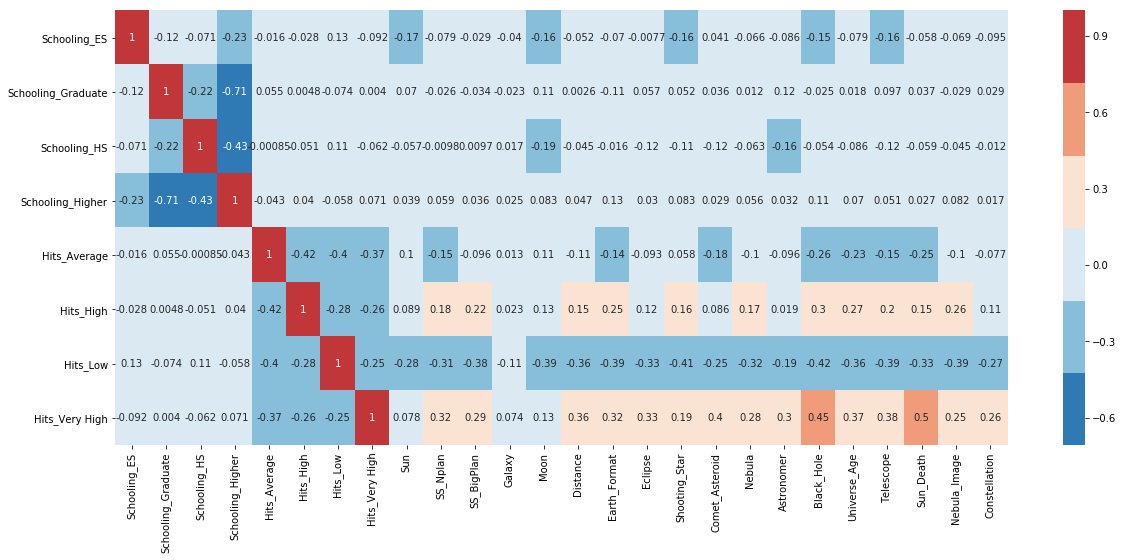

In [58]:
df_school_full = df_ans_full[df_ans_full.columns[[7,8,9,10,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,
                                               34,35,36,37,38,39,40]]]

cols_school = ['Schooling_ES', 'Schooling_HS', 'Schooling_Higher', 'Schooling_Graduate', 'Hits_Low', 'Hits_Average', 
 'Hits_High', 'Hits_Very High', 'Sun', 'SS_Nplan', 'SS_BigPlan', 'Galaxy', 'Moon', 'Distance', 'Earth_Format', 'Eclipse',
 'Shooting_Star', 'Comet_Asteroid', 'Nebula', 'Astronomer', 'Black_Hole', 'Universe_Age', 'Telescope',
 'Sun_Death', 'Nebula_Image', 'Constellation']

df_schol_full = df_school_full[cols_school] 

corr_school = df_school_full.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_school[0:8], xticklabels=corr_school.columns, yticklabels=corr_school.columns[0:8], cmap=cmap, annot=True)

plt.show()

Here, the insights are not so powerful, since correlations are very weak. We can see that low level education (ES and HS) tend to perform worse, given the presence of bluer cells in their lines. However, the most interesting thing to take away from this heatmap is the nonlinearity observed in the Graduate level: two of the most "important" questions of the questionnaire (Earth Format and Black Hole) are positively correlated with Higher Schooling, but negatively correlated with Graduate Schooling (+0.13 x -0.11 and +0.11 x -0.025, respectively) - albeit small, there _is_ a relation we did not expect to see initialy, given the premise that higher schooling would yield better hit rates. 

#### Parents Schooling

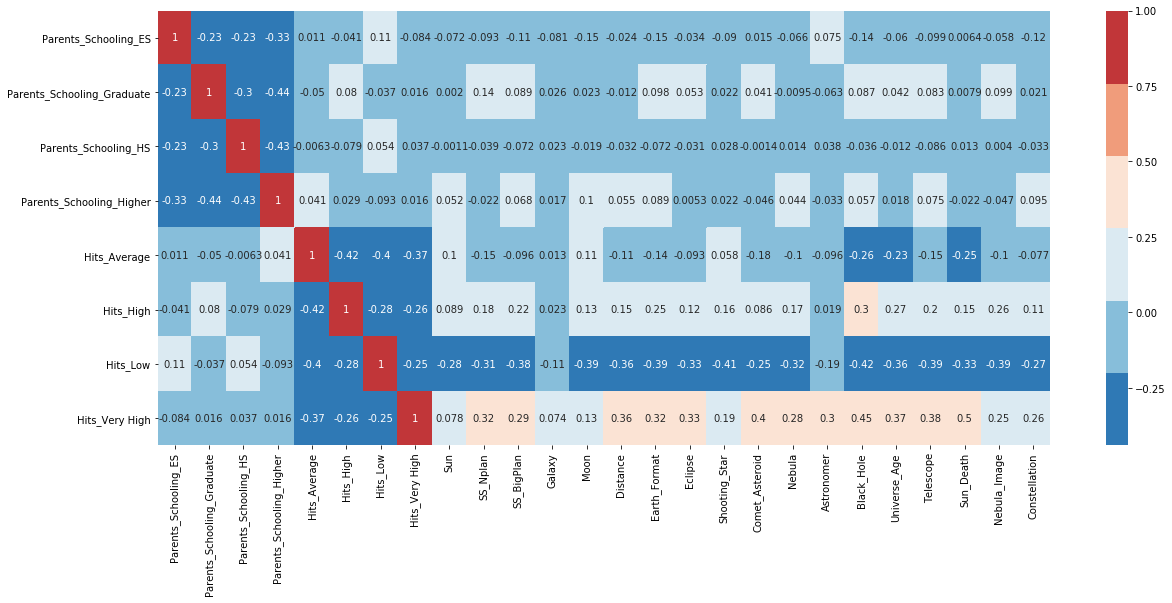

In [59]:
df_pschool_full = df_ans_full[df_ans_full.columns[[11,12,13,14,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,
                                               34,35,36,37,38,39,40]]]

cols_pschool = ['Parents_Schooling_ES', 'Parents_Schooling_HS', 'Parents_Schooling_Higher', 'Parents_Schooling_Graduate',
                'Hits_Low', 'Hits_Average', 'Hits_High', 'Hits_Very High', 'Sun', 'SS_Nplan', 'SS_BigPlan', 'Galaxy', 
                'Moon', 'Distance', 'Earth_Format', 'Eclipse', 'Shooting_Star', 'Comet_Asteroid', 'Nebula', 'Astronomer',
                'Black_Hole', 'Universe_Age', 'Telescope', 'Sun_Death', 'Nebula_Image', 'Constellation']

df_pschol_full = df_pschool_full[cols_pschool] 

corr_pschool = df_pschool_full.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_pschool[0:8], xticklabels=corr_pschool.columns, yticklabels=corr_pschool.columns[0:8], cmap=cmap, annot=True)

plt.show()

The correlations are even weaker for Parents' Schooling. We can not identify any relation with a particular question. The only thing we can infer is that people with Parents with the lowest schooling (ES) tend to perform worse, given that all questions have (very small) negative correlations, and the Hits Low group is positively correlated with them (+0.11), but it is far from a given. Aside from that, if a person's parents have HS, Higher or Graduate schooling, we can't tell the impact on either its number of hits, or probable performance on a particular question.

#### Gender

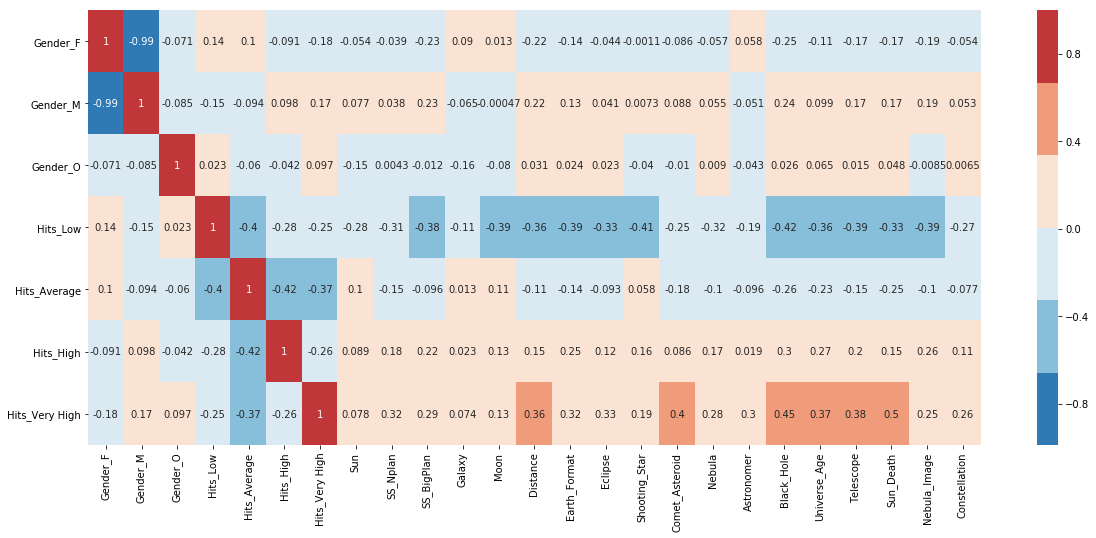

In [60]:
df_gender_full = df_ans_full[df_ans_full.columns[[4,5,6,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,
                                               34,35,36,37,38,39,40]]]

cols_gender = ['Gender_F', 'Gender_M', 'Gender_O',
                'Hits_Low', 'Hits_Average', 'Hits_High', 'Hits_Very High', 'Sun', 'SS_Nplan', 'SS_BigPlan', 'Galaxy', 
                'Moon', 'Distance', 'Earth_Format', 'Eclipse', 'Shooting_Star', 'Comet_Asteroid', 'Nebula', 'Astronomer',
                'Black_Hole', 'Universe_Age', 'Telescope', 'Sun_Death', 'Nebula_Image', 'Constellation']

df_gender_full = df_gender_full[cols_gender] 

corr_gender = df_gender_full.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_gender[0:7], xticklabels=corr_gender.columns, yticklabels=corr_gender.columns[0:7], cmap=cmap, annot=True)

plt.show()

Men have a positive correlation with all but three questions (Galaxy, Moon and Astronomer), which are actually close to 0 (< 0.1). This means that there is not a particular question in which women stood out: the worse performance is _generalized_. The most discrepant questions include: Black Hole (+0.24 x -0.25), Biggest Planet (+0.23 x -0.23) and Distance Earth-Sun (+0.22 x -0.22) - perhaps these topics should be emphasized in women-directed outreach actions. In fact, 4 of the 6 Hard Questions (excluding Universe Age and misclassified Constellation match) have > 0.15 positive correlation with Male, suggesting that Feminine performance is at its worst for most difficult/sophisticated questions. 



#### Profession

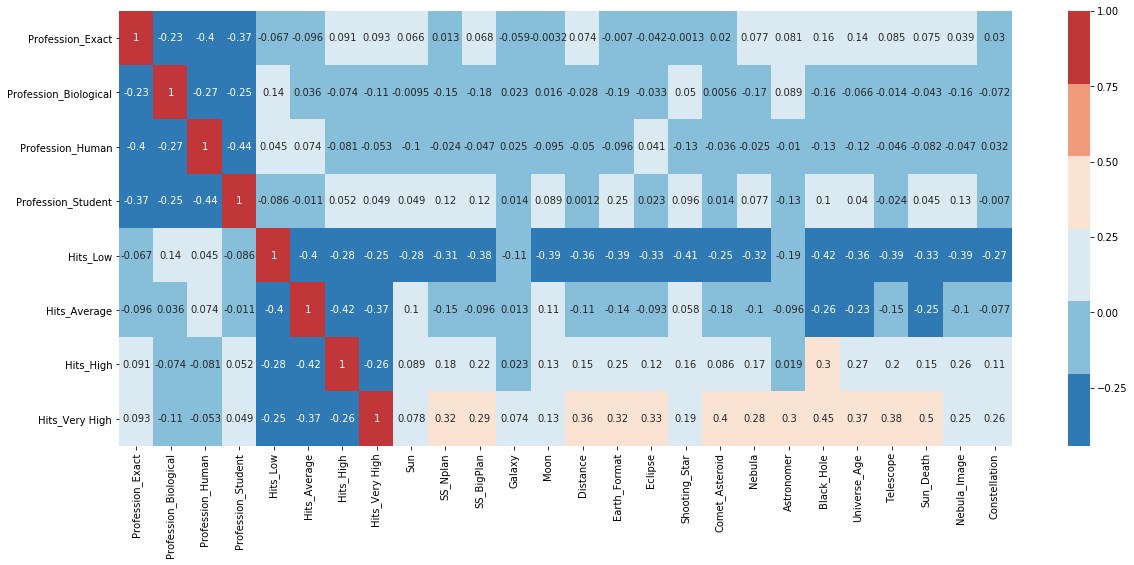

In [61]:
df_prof_full = df_ans_full[df_ans_full.columns[[15,16,17,18, 19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,
                                               34,35,36,37,38,39,40]]]

cols_prof = ['Profession_Exact', 'Profession_Biological', 'Profession_Human', 'Profession_Student',
                'Hits_Low', 'Hits_Average', 'Hits_High', 'Hits_Very High', 'Sun', 'SS_Nplan', 'SS_BigPlan', 'Galaxy', 
                'Moon', 'Distance', 'Earth_Format', 'Eclipse', 'Shooting_Star', 'Comet_Asteroid', 'Nebula', 'Astronomer',
                'Black_Hole', 'Universe_Age', 'Telescope', 'Sun_Death', 'Nebula_Image', 'Constellation']

df_prof_full = df_prof_full[cols_prof] 

corr_prof = df_prof_full.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_prof[0:8], xticklabels=corr_prof.columns, yticklabels=corr_prof.columns[0:8], cmap=cmap, annot=True)

plt.show()

All in all, it's easy to verify the trend that Exact/Student tend to have positive correlations, while Human/Biological tend to have negative correlations, though there are execptions and cases where correlations are so small that it is actually indistinguishable (also, Exact -> Hits High = +0.1 and Biological -> Hits Low = +0.15). A few cases are worth mentioning: Human professionals seem to be at their worst in the Shooting Star question (-0.15; maybe fake science bias?); Students are actually the only group correlated with the Astronomer question, and it is _negatively_ (-0.13): this is another indicator of a decline in scientific outreach effectiveness in the past few years; the strongest correlation is between Students and Earth Format (+0.25), while Biological and Human are negatively correlated, and Exact doesn't have a positive correlation (in fact, it is so close to 0 that it is non-correlated), which is somehow unexpected.

Good! Now we have a pretty solid understanding of the relations and patterns between our demographic data. Hence, we're ready to perform the last step of our exploratory analysis, which is to visualize our features in a bi-plot after applying MCA (Multiple Componente Analysis) and see if the result checks with everything we explored so far:

### Multiple Component Analysis (MCA) <a class="anchor" id="4.5"></a>

Just a disclaimer: The code was based on the work of Abdi and Valentin (https://www.utdallas.edu/~herve/Abdi-MCA2007-pretty.pdf) and the code was taken from this notebook: http://nbviewer.jupyter.org/github/esafak/mca/blob/master/docs/mca-BurgundiesExample.ipynb; I thank you guys very much for making this step sooo much easier :D

In [62]:
mca_ben = mca.MCA(df_ar, ncols=len(df_ar.columns))
data = np.array([mca_ben.L[:2], 
                 mca_ben.expl_var(greenacre=True, N=2) * 100]).T
df_mca = pd.DataFrame(data=data, columns=['cλ','%c'], index=range(1,3))
df_mca

,cλ,%c
1,0.118124,19.452453
2,0.074984,12.348185


The second column is similar to the explained variance of PCA: this means that our first two factors are retaining about 31% of the variance of the feature space, which, for MCA standards, is not so bad.

#### Calculating Factor Score, Squared cosines and Contributions

In [63]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=df_ar.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))

table3.loc[fs,    :] = mca_ben.fs_r(N=2).T
table3.loc[cos,   :] = mca_ben.cos_r(N=2).T
table3.loc[cont,  :] = mca_ben.cont_r(N=2).T * 1000

table4 = pd.DataFrame(columns=df_ar.columns, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))
table4.loc[fs,  :] = mca_ben.fs_c(N=2).T
table4.loc[cos, :] = mca_ben.cos_c(N=2).T
table4.loc[cont,:] = mca_ben.cont_c(N=2).T * 1000

np.round(table4.astype(float), 2)

Age_18 to 24  Age_25 to 44  Age_Over 45  Age_Under 18  \
Factor score         1         -0.52          0.31         0.58         -0.72   
                     2          0.15          0.18        -0.15         -1.56   
Squared cosines      1          0.79          0.28         0.65          0.14   
                     2          0.06          0.10         0.04          0.67   
Contributions x 1000 1        151.07         40.71       119.74         36.35   
                     2         19.22         22.92        11.85        271.15   

                        Gender_F  Gender_M  Gender_O  Schooling_ES  \
Factor score         1      0.20     -0.16     -0.93         -0.41   
                     2     -0.17      0.15     -1.13         -1.80   
Squared cosines      1      0.26      0.23      0.05          0.04   
                     2      0.17      0.21      0.07          0.69   
Contributions x 1000 1     26.33     19.38      7.29          8.55   
                     2     27.68     27.43     16.95        259.30   

                        Schooling_Graduate  Schooling_HS       ...        \
Factor score         1                0.58         -0.22       ...         
                     2                0.11         -0.37       ...         
Squared cosines      1                0.70          0.06       ...         
                     2                0.03          0.16       ...         
Contributions x 1000 1              128.25          8.32       ...         
                     2                7.24         36.43       ...         

                        Parents_Schooling_HS  Parents_Schooling_Higher  \
Factor score         1                  0.11                     -0.05   
                     2                 -0.03                      0.18   
Squared cosines      1                  0.03                      0.01   
                     2                  0.00                      0.19   
Contributions x 1000 1                  3.93                      1.31   
                     2                  0.44                     28.09   

                        Profession_Biological  Profession_Exact  \
Factor score         1                   0.55              0.16   
                     2                  -0.22              0.33   
Squared cosines      1                   0.34              0.06   
                     2                   0.06              0.28   
Contributions x 1000 1                  56.42              8.82   
                     2                  14.90             61.50   

                        Profession_Human  Profession_Student  Hits_Average  \
Factor score         1              0.27               -0.69          0.08   
                     2             -0.07               -0.11         -0.07   
Squared cosines      1              0.28                0.89          0.04   
                     2              0.02                0.02          0.03   
Contributions x 1000 1             32.48              193.17          3.45   
                     2              3.59                7.20          4.47   

                        Hits_High  Hits_Low  Hits_Very High  
Factor score         1      -0.15      0.17           -0.17  
                     2       0.25     -0.37            0.27  
Squared cosines      1       0.06      0.06            0.06  
                     2       0.17      0.31            0.14  
Contributions x 1000 1       7.35      8.23            7.42  
                     2      32.22     65.13           29.13  

[6 rows x 23 columns]

#### All data points on Factor 1 x Factor 2 plane

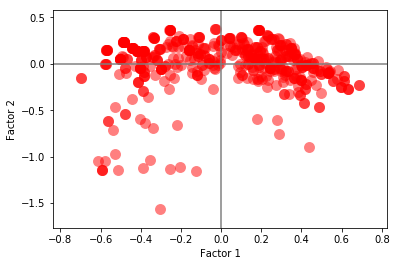

In [64]:
points = table3.loc[fs].values
labels = table3.columns.values

plt.figure()
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.scatter(*points, s=120, marker='o', c='r', alpha=.5, linewidths=0)
plt.show()

This is like a PCA1 x PCA2 plot, and we again can't clearly spot clusters or groups. Instead, let's look at the biplot.

#### Variables and Levels displayed on Factor 1 x Factor 2 plane

Before we proceed to the plot, let me first explain the coding used. Each variable is represented by a shape (see plot legend), and its level by a color. For better visualization, the color coding adopted was sequential: red, yellow, green, blue. This means that red shapes are "bad" (e.g. Hits Low), and blue are very good (e.g. Graduate Schooling). Gender colors were selected arbitrarily to avoid confusion (Male - Cyan, Female - Magenta), while Profession sequence was selected according to affinity with Astronomy (Human, Biological, Student, Exact). Remember, also, that closer variables are more associated in the dataset.

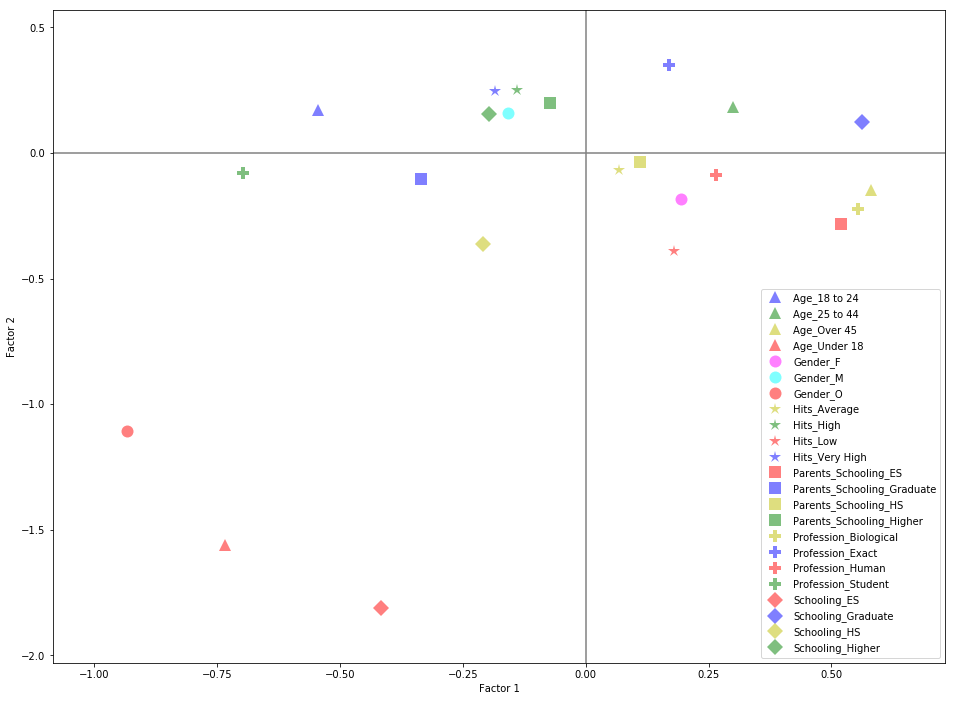

In [65]:
noise = 0.05 * (np.random.rand(*table4.T[fs].shape) - 0.5)
fs_by_source = table4.T[fs].add(noise).groupby(table4.T[fs].index)

fig, ax = plt.subplots(figsize=(16,12))
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
ax.margins(0.1)
markers = '^', '^', '^', '^', 'o', 'o', 'o', '*', '*', '*', '*', 's', 's', 's', 's', 'P', 'P', 'P', 'P', 'D', 'D', 'D', 'D'
colors = 'b', 'g', 'y', 'r', 'magenta', 'cyan', 'r', 'y', 'g', 'r', 'b', 'r', 'b', 'y', 'g', 'y', 'b', 'r', 'g', 'r', 'b', 'y', 'g' 
for fscore, marker, color in zip(fs_by_source, markers, colors):
    label, points = fscore
    ax.plot(*points.T.values, marker=marker, color=color, label=label, linestyle='', alpha=.5, mew=0, ms=12)
ax.legend(numpoints=1, loc='best')
plt.show()

This plot summarizes everything that we have seen so far! We can clearly see two distinct groups (focus on the Stars, that represent the Hits). On the top left, close to Hits High and Very High, are: Age 18 to 24, Schooling Higher, Parents' Schooling Higher, Parents' Schooling Graduate, Gender M, Profession Exact and Profession Student. And, on the bottom right, close to Hits Average and Low, are: Age Over 45, Parents' Schooling ES, Parents' Schooling HS, Gender F, Profession Human and Profession Biological. These are exactly the profiles for High Hitters (Young men, with Higher education and higher parents' education, of Exact Sciences or Students) and Low Hitters (Older women, with lower parents' education and of Human and Biological Sciences) we found looking previously at distributions, association rules and correlations! MCA just wrapps everything in a more graphical way, corroborating the previous discoveries. 

Moreover, if you look at the bottom left, you will see three features totally disconnected from the rest. They are: Gender O, Age Under 18 and Schooling ES. These are exactly the variables we have very few data (sample bias)! So, it's predictable that MCA wouldn't find relations for them, thus, they stay segregated in the diagram. It is good that our MCA was able to show that! 

On the other three variables left: High School schooling is basically in the middle of the two groups, equidistant from Low Hitters and High Hitters - this group, hence, is not associated with any of the hit groups; Age 25 to 44 is not close to Low Hits, but is actually closer to Average than High/Very High (by the way, these two groups seem hard to dissociate, since they practically overlap in the diagram); and perhaps the most interesting of all: Graduate schooling (blue diamond) is kinda isolated - this confirms our suspicion of nonlinearity between number of hits and schooling. Beforehand, we expected Graduate Schooling to be close to High Hitters, but MCA proved that it is not the case.

That's a wrap! Now we will move to the last part of the work, which is to try to build a Classifier for the Hit Group a person belongs to, based on its demographic data.

## 5) Classification <a class="anchor" id="5"></a>

### Creating Class Column

Since sklearn needs numerical inputs, Hit Groups will be binarized from 0 to 3 (0 - Low, 1 - Average, 2 - High and 3 - Very High)

In [82]:
df_clas = df_ar.copy()

def hit_class_creator (row):
    if row['Hits_Low']:
        return 0
    elif row['Hits_Average']:
        return 1
    elif row['Hits_High']:
        return 2
    elif row['Hits_Very High']:
        return 3

df_clas['Target'] = df_clas.apply(hit_class_creator, axis=1)

df_clas = df_clas.drop(['Hits_Low', 'Hits_Average', 'Hits_High', 'Hits_Very High'], axis=1)


df_clas.iloc[:, ::-1].head(3)

,Target,Profession_Student,Profession_Human,Profession_Exact,Profession_Biological,Parents_Schooling_Higher,Parents_Schooling_HS,Parents_Schooling_Graduate,Parents_Schooling_ES,Schooling_Higher,Schooling_HS,Schooling_Graduate,Schooling_ES,Gender_O,Gender_M,Gender_F,Age_Under 18,Age_Over 45,Age_25 to 44,Age_18 to 24
id,,,,,,,,,,,,,,,,,,,,
1.024865e+10,3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1.024844e+10,3,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1.024772e+10,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


### Splitting Training and Test Sets

In [83]:
X = df_clas.iloc[:,:-1].values
y = df_clas.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Now, we will try a couple different classification models, each with CV Grid Search maximazing accuracy. 

### K-NN

In [84]:
knn_parameters = {
    'n_neighbors': [2, 3, 4, 5, 8, 10, 12, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'hamming', 'jaccard']
    }

gsknn = GridSearchCV(KNeighborsClassifier(), param_grid=knn_parameters, cv=5, scoring='accuracy')
gsknn.fit(X_train, y_train)

print("Best score: %0.3f" % gsknn.best_score_)
print("Best parameters set:")
best_parameters = gsknn.best_estimator_.get_params()
for param_name in sorted(knn_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.347
Best parameters set:
	metric: 'euclidean'
	n_neighbors: 2
	weights: 'uniform'


### Random Forest

In [85]:
rf_parameters = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 20, 50, 200],
    'min_samples_leaf': [5, 10, 30, 50]
    }

gsrf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_parameters, cv=5, scoring='accuracy')
gsrf.fit(X_train, y_train)

print("Best score: %0.3f" % gsrf.best_score_)
print("Best parameters set:")
best_parameters = gsrf.best_estimator_.get_params()
for param_name in sorted(rf_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.392
Best parameters set:
	criterion: 'gini'
	max_depth: 2
	min_samples_leaf: 5
	n_estimators: 50


### Logistic Regression

In [86]:
sft_parameters = {
    'multi_class': ['multinomial', 'ovr'],
    'solver': ['lbfgs', 'sag', 'newton-cg'],
    'C': [100, 10, 1, 0.1, 0.01],
    'max_iter': [100, 1000],
    }

gssft = GridSearchCV(LogisticRegression(random_state=2), param_grid=sft_parameters, cv=5, scoring='accuracy')
gssft.fit(X_train, y_train)

print("Best score: %0.3f" % gssft.best_score_)
print("Best parameters set:")
best_parameters = gssft.best_estimator_.get_params()
for param_name in sorted(sft_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.411
Best parameters set:
	C: 1
	max_iter: 100
	multi_class: 'multinomial'
	solver: 'lbfgs'


### Retraining the models found by Grid Search (both on train and test sets)

In [89]:
knn_clf = KNeighborsClassifier(n_neighbors=2, weights='uniform', metric='euclidean')

knn_clf.fit(X_train, y_train)

y_pred_knn_train = knn_clf.predict(X_train)
y_pred_knn_test = knn_clf.predict(X_test)
acc_knn_train = accuracy_score(y_train, y_pred_knn_train)
acc_knn_test = accuracy_score(y_test, y_pred_knn_test)

rf_clf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=2, min_samples_leaf=5)

rf_clf.fit(X_train, y_train)

y_pred_rf_train = rf_clf.predict(X_train)
y_pred_rf_test = rf_clf.predict(X_test)
acc_rf_train = accuracy_score(y_train, y_pred_rf_train)
acc_rf_test = accuracy_score(y_test, y_pred_rf_test)

sft_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=100)

sft_clf.fit(X_train, y_train)

y_pred_sft_train = sft_clf.predict(X_train)
y_pred_sft_test = sft_clf.predict(X_test)
acc_sft_train = accuracy_score(y_train, y_pred_sft_train)
acc_sft_test = accuracy_score(y_test, y_pred_sft_test)

We will add a Voting Classifier as well, to see if the errors made are similar.

### Voting Classifier

In [90]:
voting_clf = VotingClassifier(
    estimators=[('knn', knn_clf), ('random', rf_clf), ('logi', sft_clf)], voting='hard'
)

voting_clf.fit(X_train, y_train)

y_pred_vt_train = voting_clf.predict(X_train)
y_pred_vt_test = voting_clf.predict(X_test)
acc_vt_train = accuracy_score(y_train, y_pred_vt_train)
acc_vt_test = accuracy_score(y_test, y_pred_vt_test)

### See the results <a class="anchor" id="5.1"></a>

In [91]:
acc_res = np.round(pd.DataFrame(columns=['Acc_Train', 'Acc_Test'], 
                                index=['KNN', 'Random Forest', 'Logistic Regression', 'Voting'],
            data=[[acc_knn_train, acc_knn_test], [acc_rf_train, acc_rf_test], [acc_sft_train, acc_sft_test], 
                  [acc_vt_train, acc_vt_test]]).sort_values(by='Acc_Test', ascending=False).astype(float), 2)

acc_res

,Acc_Train,Acc_Test
Random Forest,0.39,0.35
KNN,0.49,0.33
Voting,0.46,0.27
Logistic Regression,0.44,0.26


The accuracies do not look good... Our best model was the Random Forest, with 35% of Acc. on the Test Set. Given that this is a 4-class problem, it is slightly better than a random model, that would have an Acc. of around 25% (actually a little more than that, since the classes are not perfectly balanced). Logistic Regression and Voting Classifier are actually just as bad as a random classifier! Worth noting is that all but the Random Forest overfit the Training Set, so this model generalizes better to new data. We are dealing with very intricate relations between features, and this reflects on the low accuracies found; still, _something_ is being absorved, since K-NN and Random Forest are sliiightly better than random.

### Feature Importance <a class="anchor" id="5.2"></a>

Let's take a look at feature importance found by the Random Forest; maybe there is a smaller subset of features that is more relevant to the splits made, and we can retry a condensed model with this subset.

In [92]:
for name, score in zip(df_clas.columns[:-1], rf_clf.feature_importances_):
    print(name, round(score, 2))

Age_18 to 24 0.06
Age_25 to 44 0.02
Age_Over 45 0.09
Age_Under 18 0.06
Gender_F 0.18
Gender_M 0.19
Gender_O 0.0
Schooling_ES 0.02
Schooling_Graduate 0.02
Schooling_HS 0.03
Schooling_Higher 0.05
Parents_Schooling_ES 0.03
Parents_Schooling_Graduate 0.02
Parents_Schooling_HS 0.05
Parents_Schooling_Higher 0.01
Profession_Biological 0.06
Profession_Exact 0.07
Profession_Human 0.04
Profession_Student 0.01


Every feature seems to have its own importance, but one stands out from the rest: Gender. It is responsible for almost 40% of the splits made by the Trees; so, we will try to retrain the same forest using only the Gender information, and see if it performs better.

### Retry same Random Forest reducing Features only to Gender

In [93]:
X_red = df_clas.iloc[:,4:6].values

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y, test_size = 0.25, random_state = 0)

rf_red_clf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=2, min_samples_leaf=5)

rf_red_clf.fit(X_red_train, y_red_train)

y_pred_rf_red_train = rf_red_clf.predict(X_red_train)
y_pred_rf_red_test = rf_red_clf.predict(X_red_test)
acc_rf_red_train = accuracy_score(y_red_train, y_pred_rf_red_train)
acc_rf_red_test = accuracy_score(y_red_test, y_pred_rf_red_test)

print('Acc. on Training set: ', acc_rf_red_train, '\nAcc. on Test set: ', acc_rf_red_test)

Acc. on Training set:  0.376 
Acc. on Test set:  0.368


Well, it does not change much; it's still better than KNN, but reducing to just the dominant feature doesn't improve accuracy, rather decreasing it by a little bit.

### Neural Network

Since relations are complex, this task is better suited for Deep Neural Networks. It is not in the scope of this work to do hyperparameter tuning and build the appropriate architecture (though it would be interesting to do so when more data is available); instead, a simple MLP will be run without much "extravaganza", just to try to prove a point.  

In [120]:
features = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[900,900,900,900,900,900,900,900], n_classes=4, 
                                         activation_fn= tf.nn.relu, feature_columns=features)

dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size=100, steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7feb33c9b7b8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp0a8us73s'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp0a8us73s/mo

INFO:tensorflow:global_step/sec: 9.73353
INFO:tensorflow:loss = 0.7088061, step = 7201 (10.272 sec)
INFO:tensorflow:global_step/sec: 11.204
INFO:tensorflow:loss = 0.6911013, step = 7301 (8.926 sec)
INFO:tensorflow:global_step/sec: 10.66
INFO:tensorflow:loss = 0.6717375, step = 7401 (9.379 sec)
INFO:tensorflow:global_step/sec: 11.0683
INFO:tensorflow:loss = 0.67755264, step = 7501 (9.036 sec)
INFO:tensorflow:global_step/sec: 11.1225
INFO:tensorflow:loss = 0.7054623, step = 7601 (8.989 sec)
INFO:tensorflow:global_step/sec: 11.2374
INFO:tensorflow:loss = 0.7110788, step = 7701 (8.901 sec)
INFO:tensorflow:global_step/sec: 11.4937
INFO:tensorflow:loss = 0.64681906, step = 7801 (8.699 sec)
INFO:tensorflow:global_step/sec: 11.4483
INFO:tensorflow:loss = 0.6718488, step = 7901 (8.735 sec)
INFO:tensorflow:global_step/sec: 11.5201
INFO:tensorflow:loss = 0.6121572, step = 8001 (8.682 sec)
INFO:tensorflow:global_step/sec: 11.2124
INFO:tensorflow:loss = 0.6603426, step = 8101 (8.917 sec)
INFO:tenso

SKCompat()

In [162]:
y_pred_dnn_train = dnn_clf.predict(X_train)
y_pred_dnn_test = dnn_clf.predict(X_test)

acc_dnn_train = accuracy_score(y_train, y_pred_dnn_train['classes'])
acc_dnn_test = accuracy_score(y_test, y_pred_dnn_test['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0a8us73s/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0a8us73s/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


### Final Accuracy Table <a class="anchor" id="5.3"></a>

In [177]:
acc_res.loc['Neural Network'] = [acc_dnn_train, acc_dnn_test]
acc_res.loc['Random Forest (reduced)'] = [acc_rf_red_train, acc_rf_red_test]

np.round(acc_res.sort_values(by='Acc_Test', ascending=False).astype(float) , 3)

,Acc_Train,Acc_Test
Neural Network,0.637,0.384
Random Forest,0.390,0.380
Random Forest (reduced),0.376,0.368
Voting,0.430,0.360
KNN,0.440,0.350
Logistic Regression,0.420,0.290


And there it is! Without even thinking about proper architecture, activation functions, number of layers and etc, we already achieved a better accuracy with a Neural Network. It is, however, terribly overfitting the Training set, but the accuracy on it is tremendously greater than the other models - an indication that a neural network can, indeed, capture the intricacies between features.

### Error Analysis <a class="anchor" id="5.4"></a>

Lastly, we will look at the errors made by each classifier, to see if there is any tendency, and if they made the same kind of errors. What will follow up are matrices where rows are actual values and columns are predicted values. The same color coding (Blue to Red) was adopted, and the values inside cells represent the percentage of each predicted class (rowise) - so, a perfect classifier would be red in the diagonal and blank in the rest, meaning that 100% of the classes were correctly predicted.

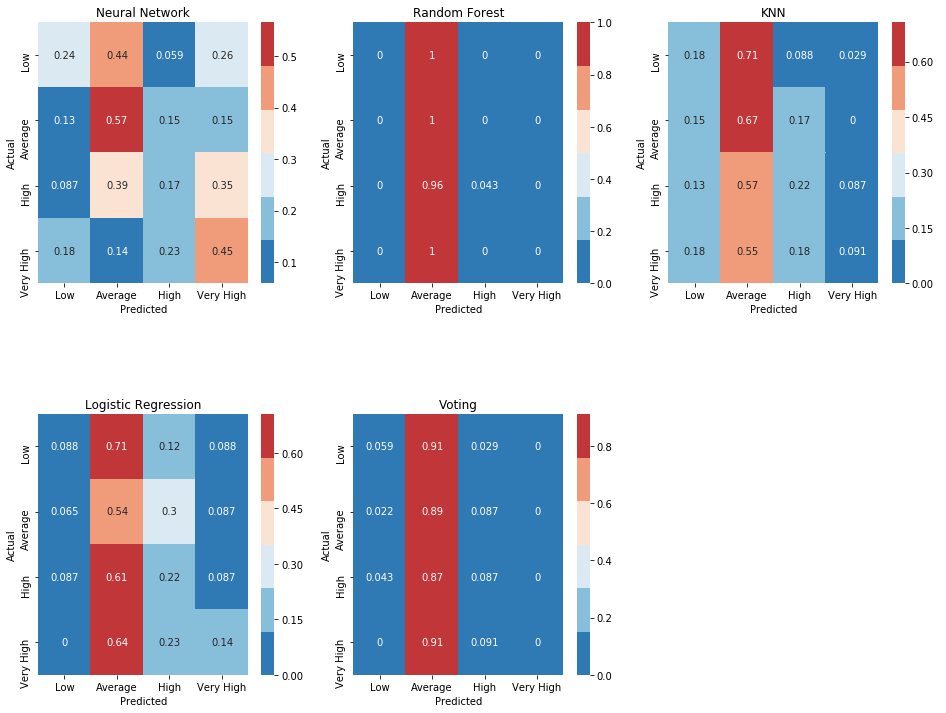

In [199]:
conf_dnn = confusion_matrix(y_test, y_pred_dnn_test['classes'])
row_sums_dnn = conf_dnn.sum(axis=1, keepdims=True)
norm_conf_dnn = conf_dnn / row_sums_dnn

conf_rf = confusion_matrix(y_test, y_pred_rf_test)
row_sums_rf = conf_rf.sum(axis=1, keepdims=True)
norm_conf_rf = conf_rf / row_sums_rf

conf_knn = confusion_matrix(y_test, y_pred_knn_test)
row_sums_knn = conf_knn.sum(axis=1, keepdims=True)
norm_conf_knn = conf_knn / row_sums_knn

conf_sft = confusion_matrix(y_test, y_pred_sft_test)
row_sums_sft = conf_sft.sum(axis=1, keepdims=True)
norm_conf_sft = conf_sft / row_sums_sft

conf_vt = confusion_matrix(y_test, y_pred_vt_test)
row_sums_vt = conf_vt.sum(axis=1, keepdims=True)
norm_conf_vt = conf_vt / row_sums_vt

lab = ['Low', 'Average', 'High', 'Very High']

fig, axarr = plt.subplots(2, 3, figsize=(16, 12))

sns.heatmap(norm_conf_dnn, xticklabels=lab, yticklabels=lab, cmap=cmap, annot=True, ax=axarr[0][0])
axarr[0][0].set_title('Neural Network')
sns.heatmap(norm_conf_rf, xticklabels=lab, yticklabels=lab, cmap=cmap, annot=True, ax=axarr[0][1])
axarr[0][1].set_title('Random Forest')
sns.heatmap(norm_conf_knn, xticklabels=lab, yticklabels=lab, cmap=cmap, annot=True, ax=axarr[0][2])
axarr[0][2].set_title('KNN')
sns.heatmap(norm_conf_sft, xticklabels=lab, yticklabels=lab, cmap=cmap, annot=True, ax=axarr[1][0])
axarr[1][0].set_title('Logistic Regression')
sns.heatmap(norm_conf_vt, xticklabels=lab, yticklabels=lab, cmap=cmap, annot=True, ax=axarr[1][1])
axarr[1][1].set_title('Voting')
axarr[1][2].axis('off')


for i in range(2):
    for j in range(3):
        axarr[i][j].set_ylabel('Actual')
        axarr[i][j].set_xlabel('Predicted')

plt.subplots_adjust(hspace=0.5, wspace=.2)
sns.despine(bottom=True, left=True)

Wow! Take a look at the Random Forest Classifier. We thought it had the best performance, smartly finding the best splits according to the features, but it again falls in the trap of the mode (now, we are _classifying by the mode_): it just classifies "Average" all the time. This is a strong indication that 500 data points are not enough for the trees to correctly identify the splits, and the best they can do is just guess based on the dominant class. The same happens with the Voting Classifier, with just a little damping. Both KNN and Logistic Regression do a "better" job, although still more than half of the time, for each class, they predict Average. Curiously enough, the fewest Average prediction proportion Logistic Regression does is when it is actually Average (54%, against 71%, 61% and 64% for the other classes). These two models perform worse on the extreme classes: KNN does a better job predicting Low Hitters (18% against 9%), while Logistic Regression better predicts Very High Hitters (14% against 9%). Also, both do a nice job of separating Average Hitters from Very High Hitters (KNN never classifies an Average Hitter as a Very High Hitter) and Low Hitters from Very High Hitters (both have this misclassification < 9%). So, if we get many more data and balance every feature and class, the accuracies should greatly improve.

Now, the Neural Network heatmap is clearly different from the others; what first catches the eye is that it doesn't suffer from the "Average bias", as there is only one red cell (which is, by the way, the correctly classified Average Hitter). Actually, the accuracies for each class are much better than any other model (Low - 24%, Average - 57%, High - 17% and Very High - 45%). It is, actually, a pretty decent Very High Hitter Classifier! There are some holes, like 26% of Low Hitters being classified as Very High Hitters, but all in all it is a much more "reasonable" classifier, whose accuracy is deeply impaired because of the Average class being unbalanced.

In the end, it is clear that the way to reach a better accuracy is to collect a massive amount of data and train a DNN built with the proper architecture and hyperparameters.

## 6) Conclusions and Perspectives <a class="anchor" id="6"></a>

A questionnaire consisting of 18 questions about Astronomy was answered by 500 people, and an attempt to describe how their demographic data relates to perfomance was made. Through many analytical techniques such as bar charts, correlation heatmaps, association rule and Multiple Component Analysis, _two_ distinct respondent groups could be spotted: one composed of young men, working with Exact Sciences or being students and with a high level of education, more associated to High or Very High score; and another composed of older women, working with Human or Biological Sciences and with a lower level of education, more associated to Low or Average score. 

Both regression and classification models "failed", presenting low accuracies and high errors: in fact, our best results came when we were classifying or predicting "by the mode", just putting everyone into the "Average" Hit Group, which is predominant in our sample. Despite performing barely better than a random classifier, a Neural Network approach seems promising, since a plain, simple DNN poorly tuned and constructed outperformed all models and evaded the "Average bias", presenting more reasonable predictions. 

Speaking of the questions, the Hard ones are more correlated to a better performance, as expected. Through a meticulous process of calibration, we could also spot misclassified questions in relation to their difficulties, though they are well calibrated, overall. Only 4 questions had above 75% of Hits (Shooting Star, Moon, Sun and Galaxy), and another four had 50% or below (Black Hole (37%), Comet/Asteroid (40%), Distance (47%) and Black Hole (50%)).

Both Random Forest (through Feature Importance) and Association Rule indicated that the demographic data that best discriminates the Hit Group of the respondent is Gender - with Men presenting a significantly better performance (indication of the _patriarchy_ culture). It is worth noting, though, that when Gender is mixed with the other features the scenario is more cloudy and harder to describe with so few data points, which explains the low accuracies found.

Two questions are interestingly related to age: Earth Format is negatively correlated to Over 45 years old people, and positively correlated to young people, which illustrates the "Earth is round" motto that was deconstructed over the past few years (the same happens with the Biggest Planet of our Solar System question). The inverse effect is observed in the Astronomer question, raising an hypothesis that younger people are less informed about our scientists, product of a decline in scientific investment in Brazil. Also, extremes (Under 18 and Over 45) performed worse on the Hard questions.

No significant relation was found between questions or Hit Groups and Parents' Schooling, aside from the fact that children of parents with the lower level of education (Elementary School) tend to be more associated with the Low Hit Group. Biological Sciences professionals had the worst performance, followed closely by Human and not closely by Student and Exact. A few remarks regarding profession: Human professionals have a negative correlation with the Shooting Star question, which may be explained by all the fake science so popularized about the topic; again the Earth Format and Astronomer questions: the former is positively correlated with Students (and negatively to Human and Biological, non-correlated with Exact), while the latter is _negatively_ correlated to the same group. Both corroborate to the hypotheses formulated regarding "popular fake science mottos" and the decline in scientific outreach effectiveness in recent years.

Another interesting insight taken from the study is the _nonlinearity_ in Schooling level and number of hits. While performance does get better as education grows from ES to HS and then to Higher, the trend stops at Graduate. In fact, two of the most "important" questions of the questionnaire (Earth Format and Black Hole) are actually _negatively_ correlated with Graduate Schooling, whilst positively correlated with Higher Schooling. The demographic distributions of High and Very High Hitters both show that the proportions of these groups are greater for Higher Schooling than for Graduate Schooling. Also, Graduate Schooling has the highest proportion among Average Hitters. MCA also spotted this effect, as Graduate Schooling stayed rather isolated in the diagram, when it was expected that it would be close to the High/Very High Hit Group (if Schooling was indeed linear).

In essence, I hope this study and metodology adopted serves as a pipeline for future works, as more data will certainly improve the models. The sample was too small and highly biased; still, many interesting insights could be taken. The idea is to apply the same questionnaire (recalibrating the misclassified questions) and the same analysis (without having to aggregate groups, ideally) but with many more data, and with people coming from different places and social realities. Both Hit Groups and demographic data need to be more balanced and represented if a better profile description and classification/regression is to be made, in special: Low and Very High Hitters, people not identified as either Male or Female, teenagers, and people with lower levels of education (Elementary and High School). Also, it would be interesting to include a few more demographic information, such as monthly income and birthplace (not included in this study because there would not be much variance, because of sampling bias), to discriminate even better one person from another. Then, if we were able to collect a few dozens of thousands answers from all around the country (say, like, 70000), we would be able to really know the profile of the Hit Groups and the patterns associated with each demographic information (and see if the findings of this preliminary study hold true), and then take the appropriate outreach actions, directed to specific groups of people. A much better DNN could then be trained, adjusting the hyperparameters and architecture, reaching a much higher accuracy (75% maybe?). More important than the results, the main takeaway from this study is the whole pipeline and its metodology of analysis; it is clear that there is an immense potential to be explored, and that, provided with more data, will prove extremely helpful for scientific outreach in Brazil.  
